# Código 

En estas primeras dos secciones (Configurando el cuaderno y de Extraer y graficar los datos) se utiliza en su totalidad el código desarrollado por Ana Daniela del Río Pulido and Erin C. McKiernan disponible en https://gist.github.com/emckiernan/3e7e86a48256777e9e6a44ede032d938. El resto del código corresponde a una modificación del trabajo mencionado anteriormente.

## Configurando el cuaderno

In [55]:
# Imports python libraries
import numpy as np
import os  #para buscar en las carpetas la root path de cada archivo
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import butter, lfilter, filtfilt #for filtering data
from statistics import stdev
sys.path.insert(1, r'./../functions') # add to pythonpath

# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

##  Extraer y graficar los datos.

In [56]:
#Function that extracts the number of recording channels, sampling rate, time and signal
#variable is the path and filename of the .wav file
def ecg(variable):
    record = wave.open(variable, 'r') # load the data

    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() #number of channels
    numFrames = record.getnframes() #number of frames
    sampleRate = record.getframerate() #sampling rate
    sampleWidth = record.getsampwidth()
    
    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Get time window
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))

    return timeECG, waveData

## Busqueda de los archivos

Se procede a buscar los archivos de audio en la carpeta de procedencia. En dicha carpeta se encuentran 15 archivos .wav llamados f0010,f0011,...,f0025.

In [57]:
#Función que retorna una lista con las rutas (path) de cada archivo.wav
def rutaAudios ():
    CarpetaAudios = r"C:\Users\marti\OneDrive - Universidad de Costa Rica\UCR_2019\Bach. Ing Eléctrica\IIS_2023\Señales II\Proyecto1"


    audios = []  # se define una lista con la ruta de los archivos .wav

    for filename in os.listdir(CarpetaAudios):  # Se buscan archivos en la carpeta 
        if filename.endswith(".wav"):  # se buscan archivos .wav (audios)
            ruta = os.path.join(CarpetaAudios, filename)
            audios.append(filename)
    return audios

audios = rutaAudios()

#print (audios[:])


## Representación gráfica de los archivos .wav 

Una vez definido la ruta o direccion de cada archivo se procede a graficar.
Considere que por aspectos prácticos solo se va a graficar 2 archivos de audio (f0010,f0017). Sin embargo, el código procesa todos lor archivos .wav que estén en ese directorio.

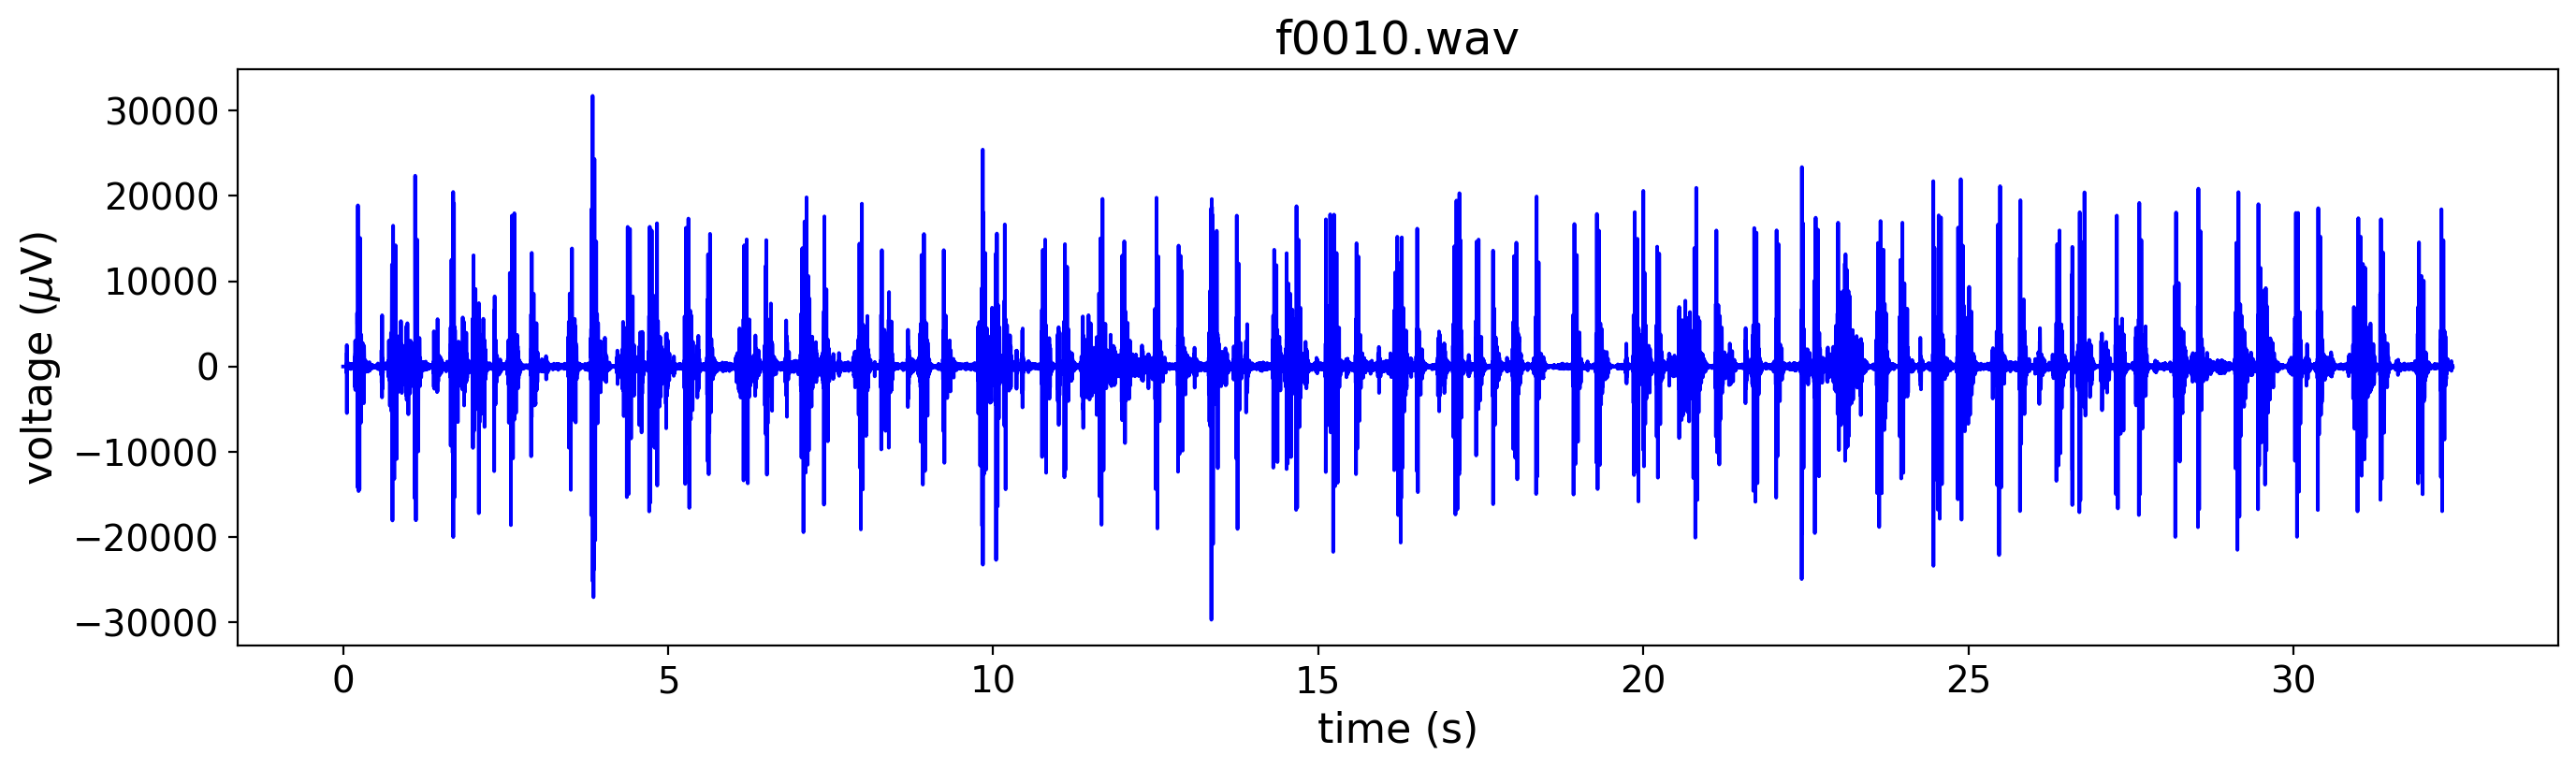

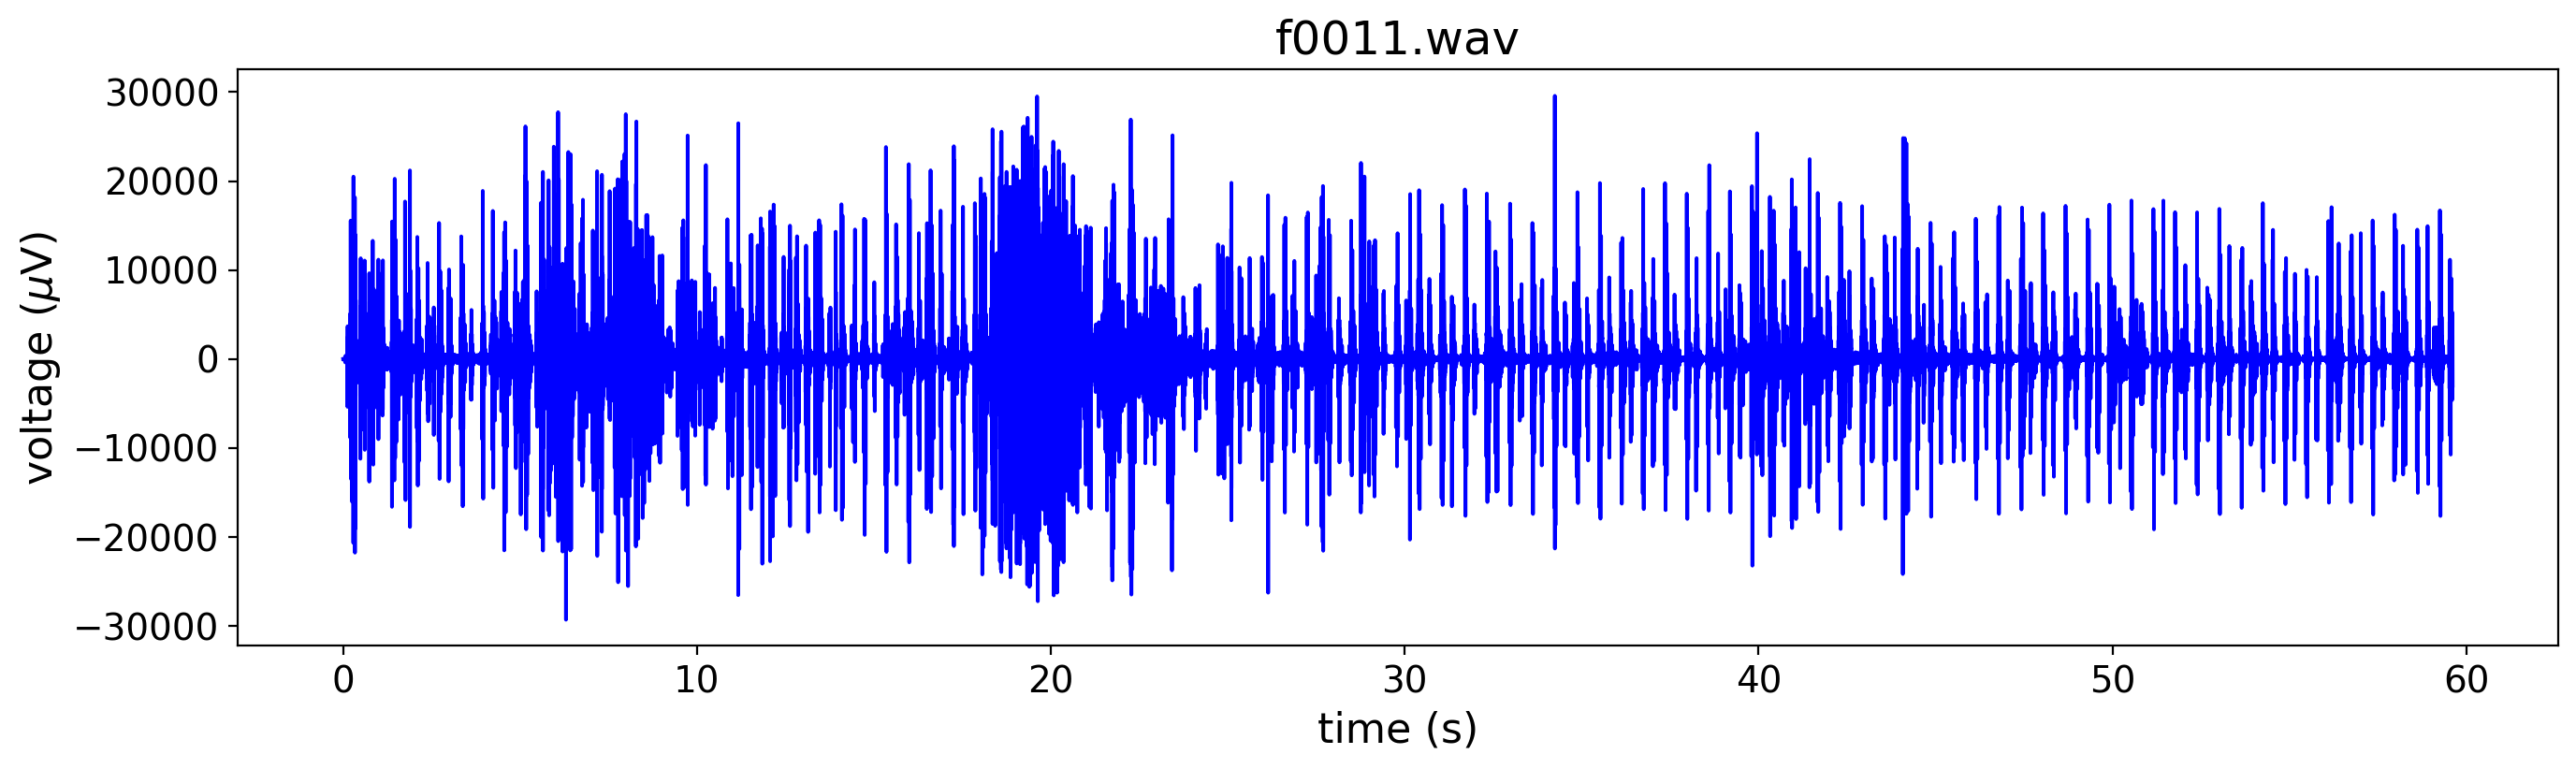

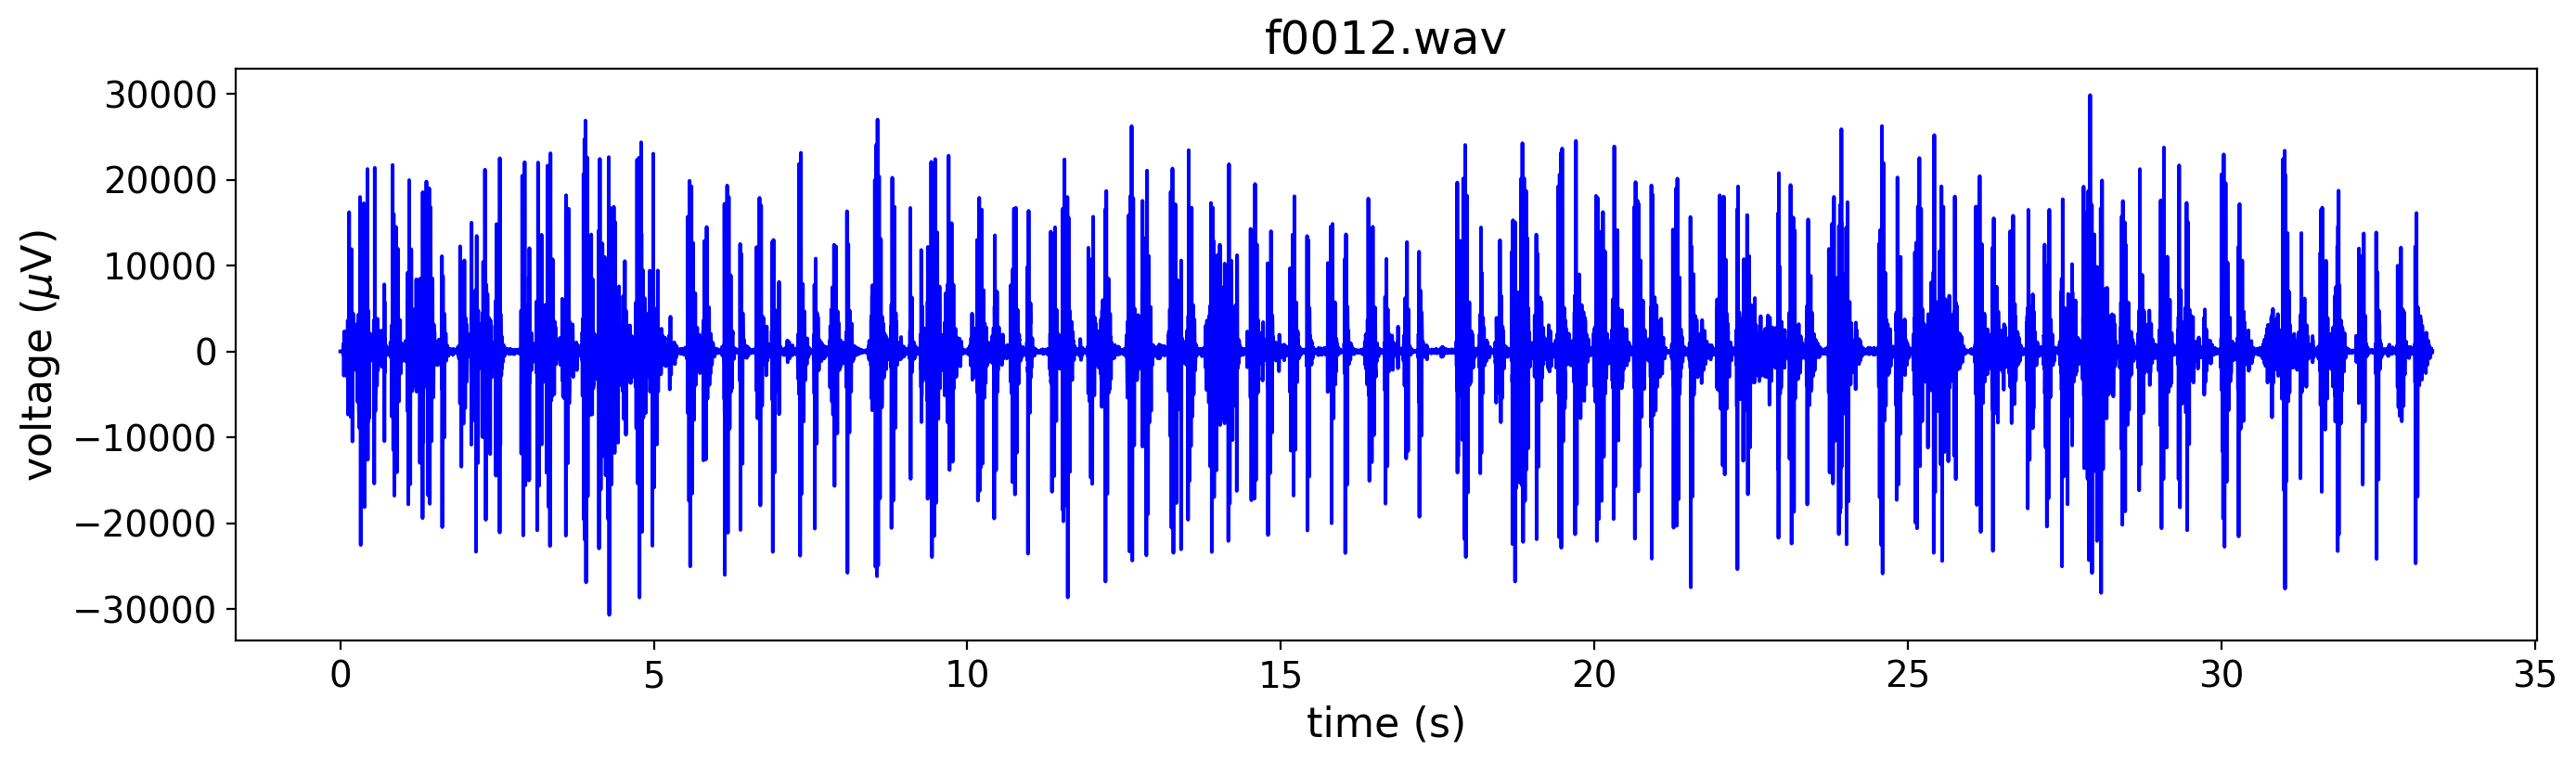

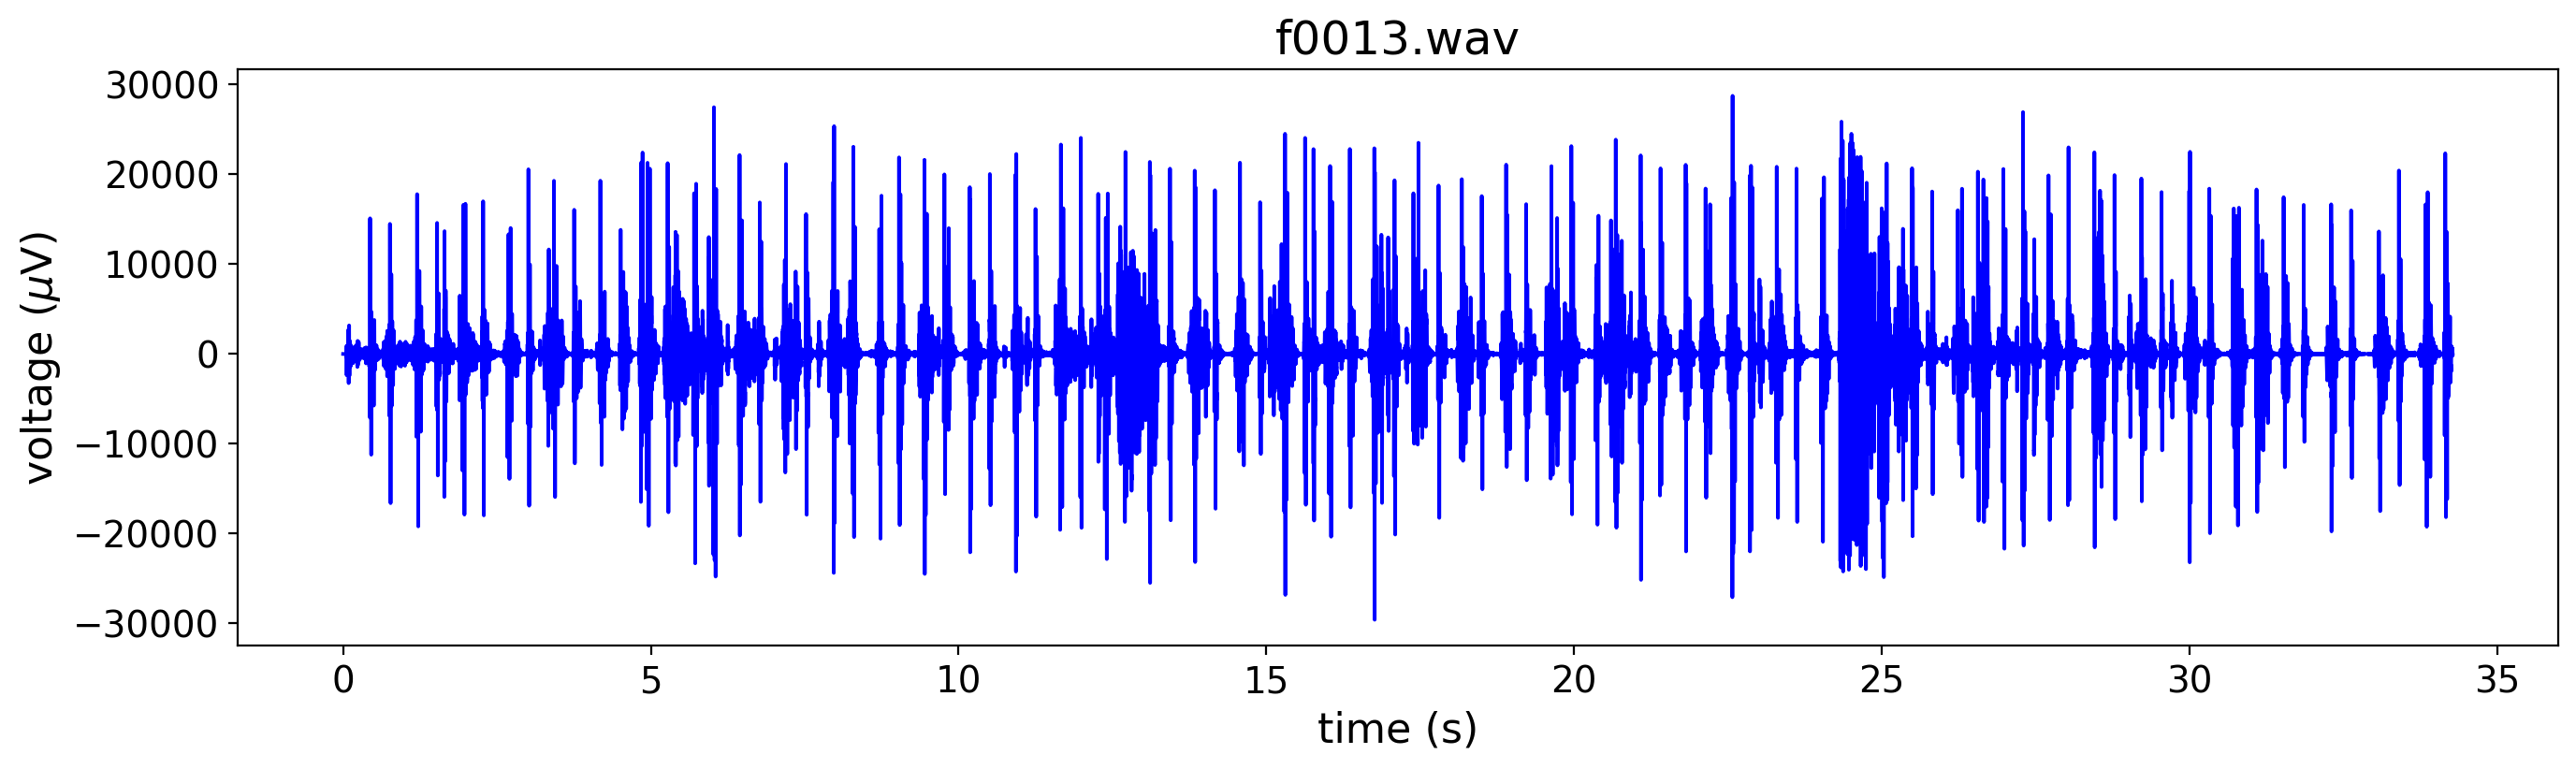

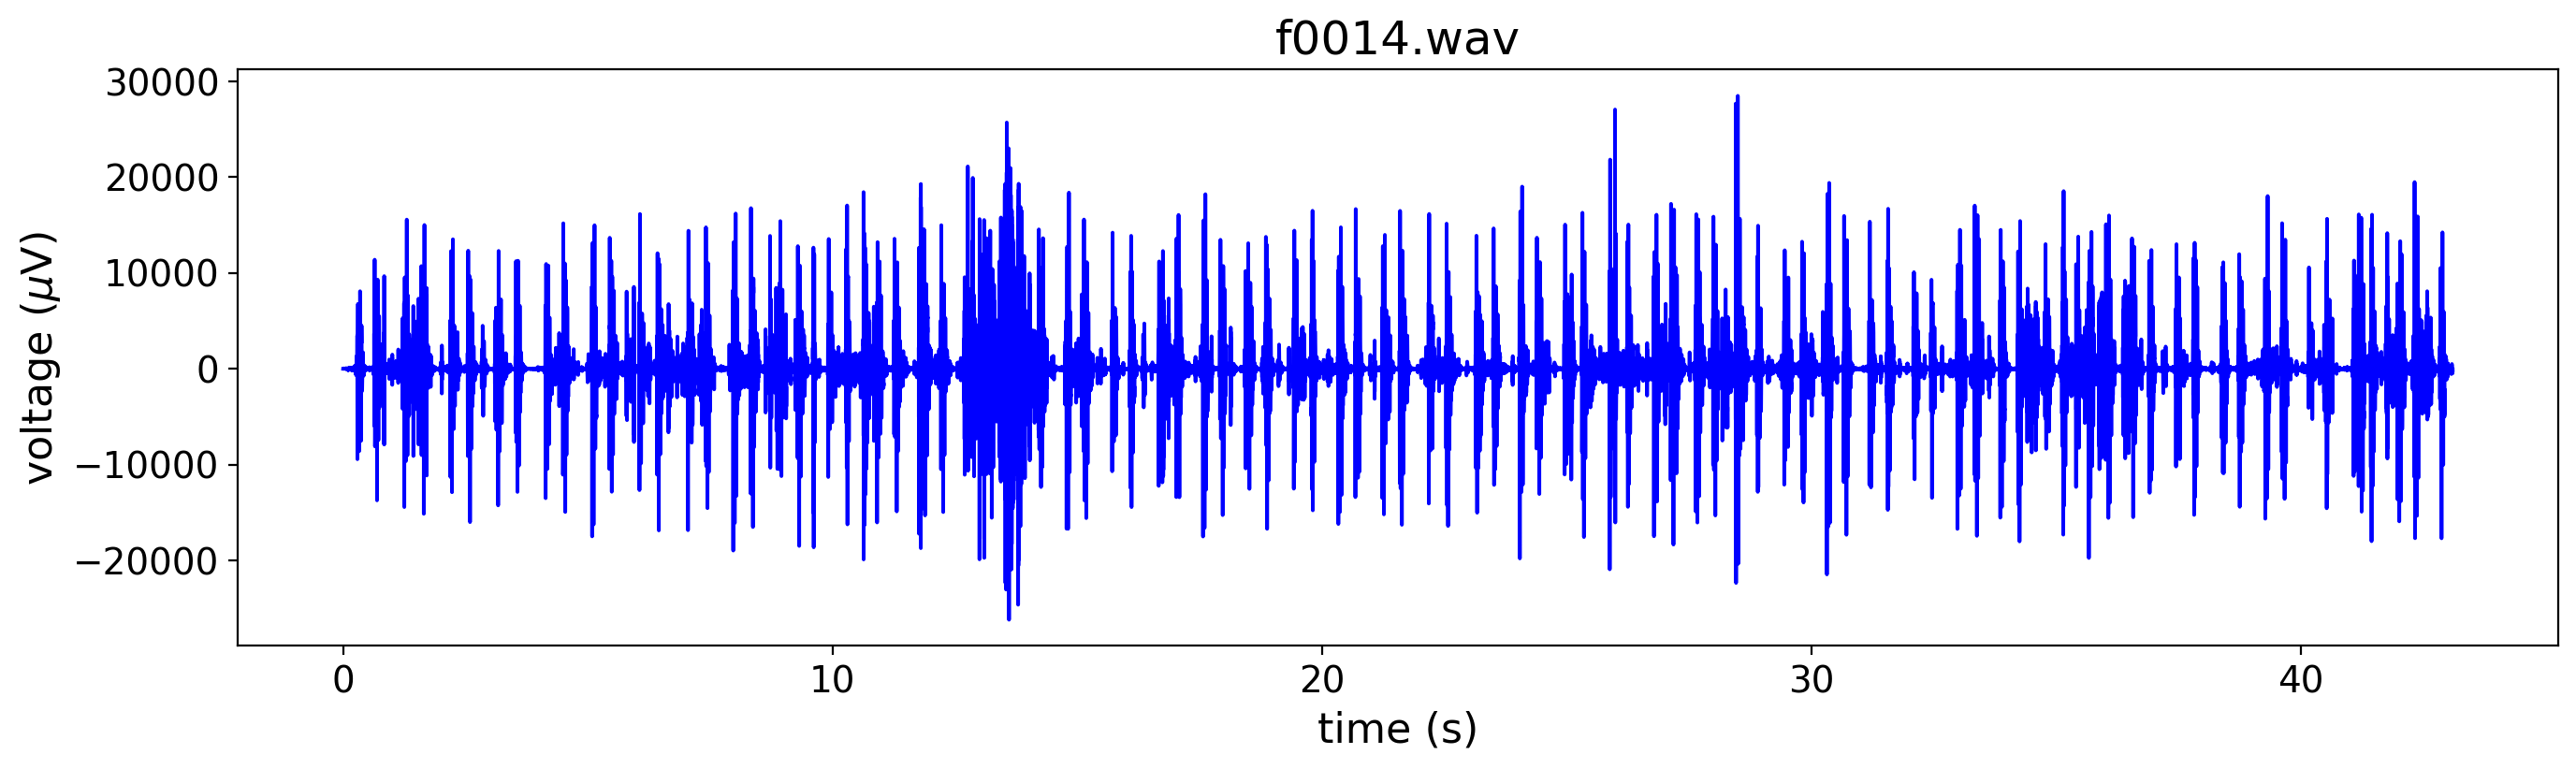

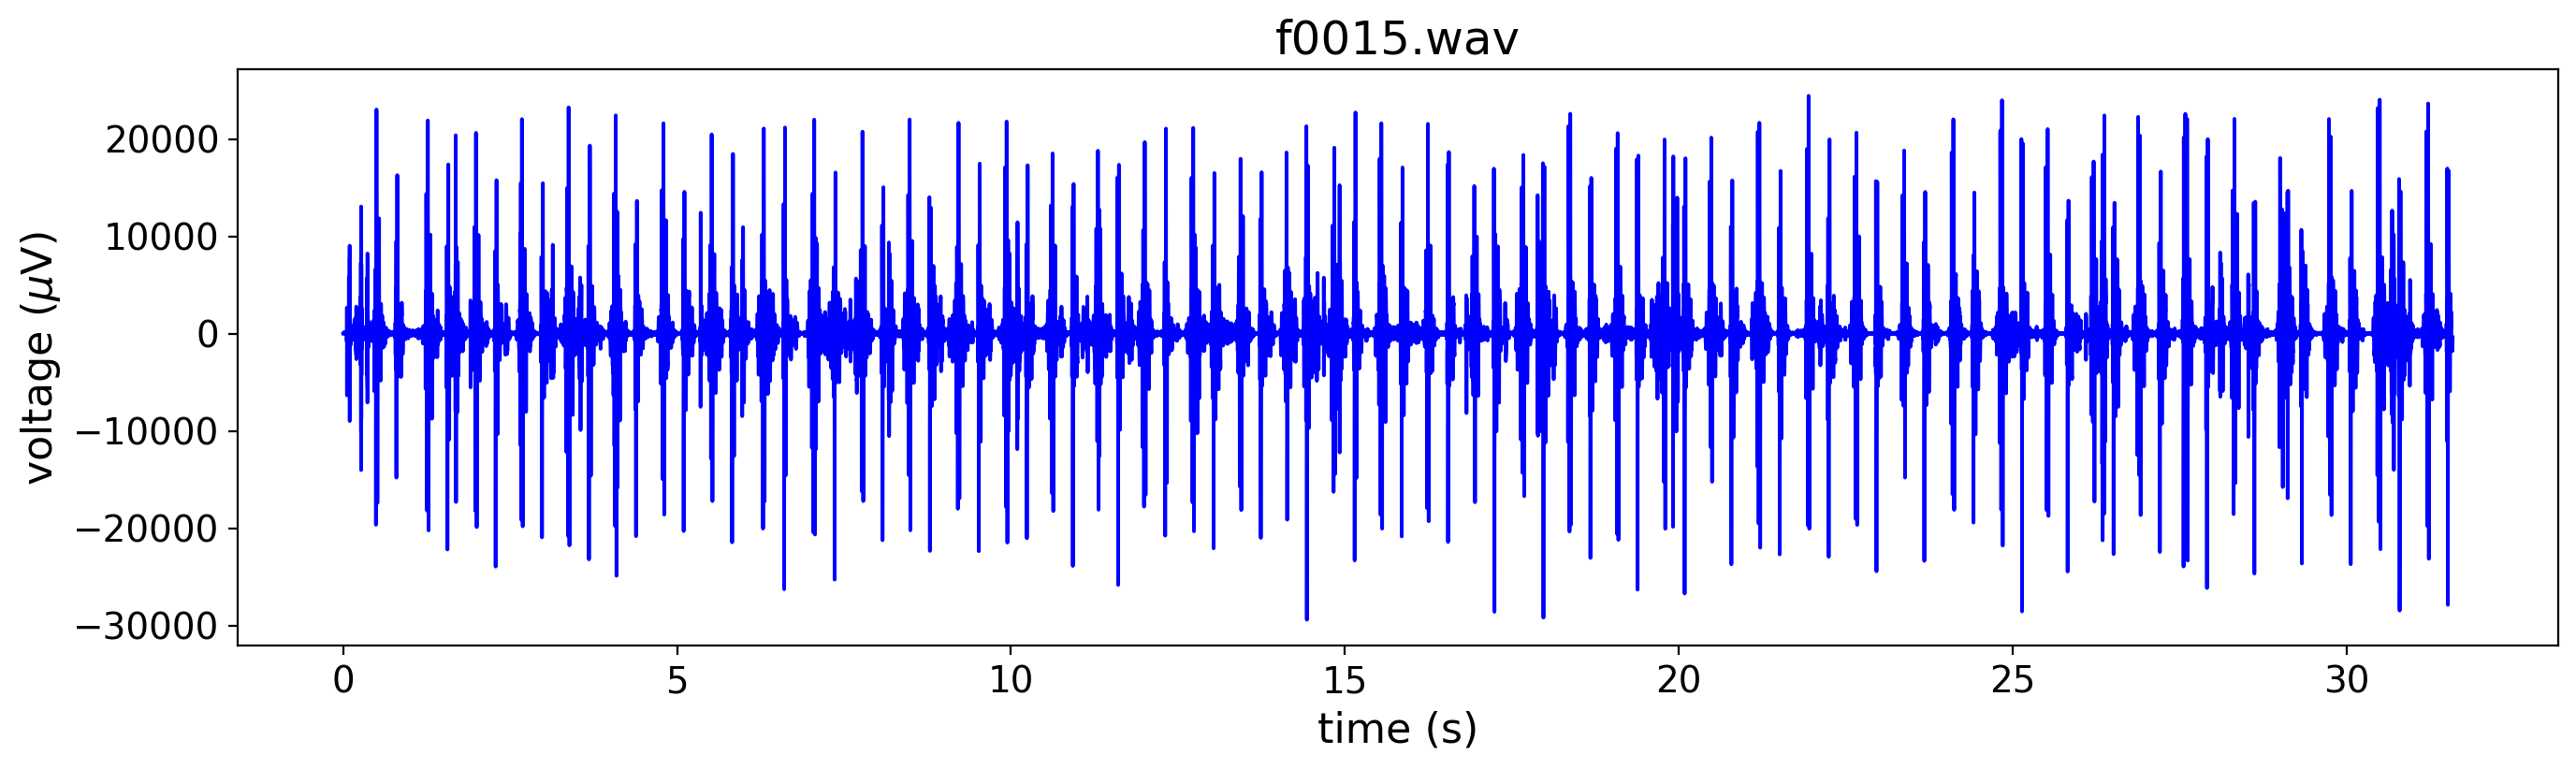

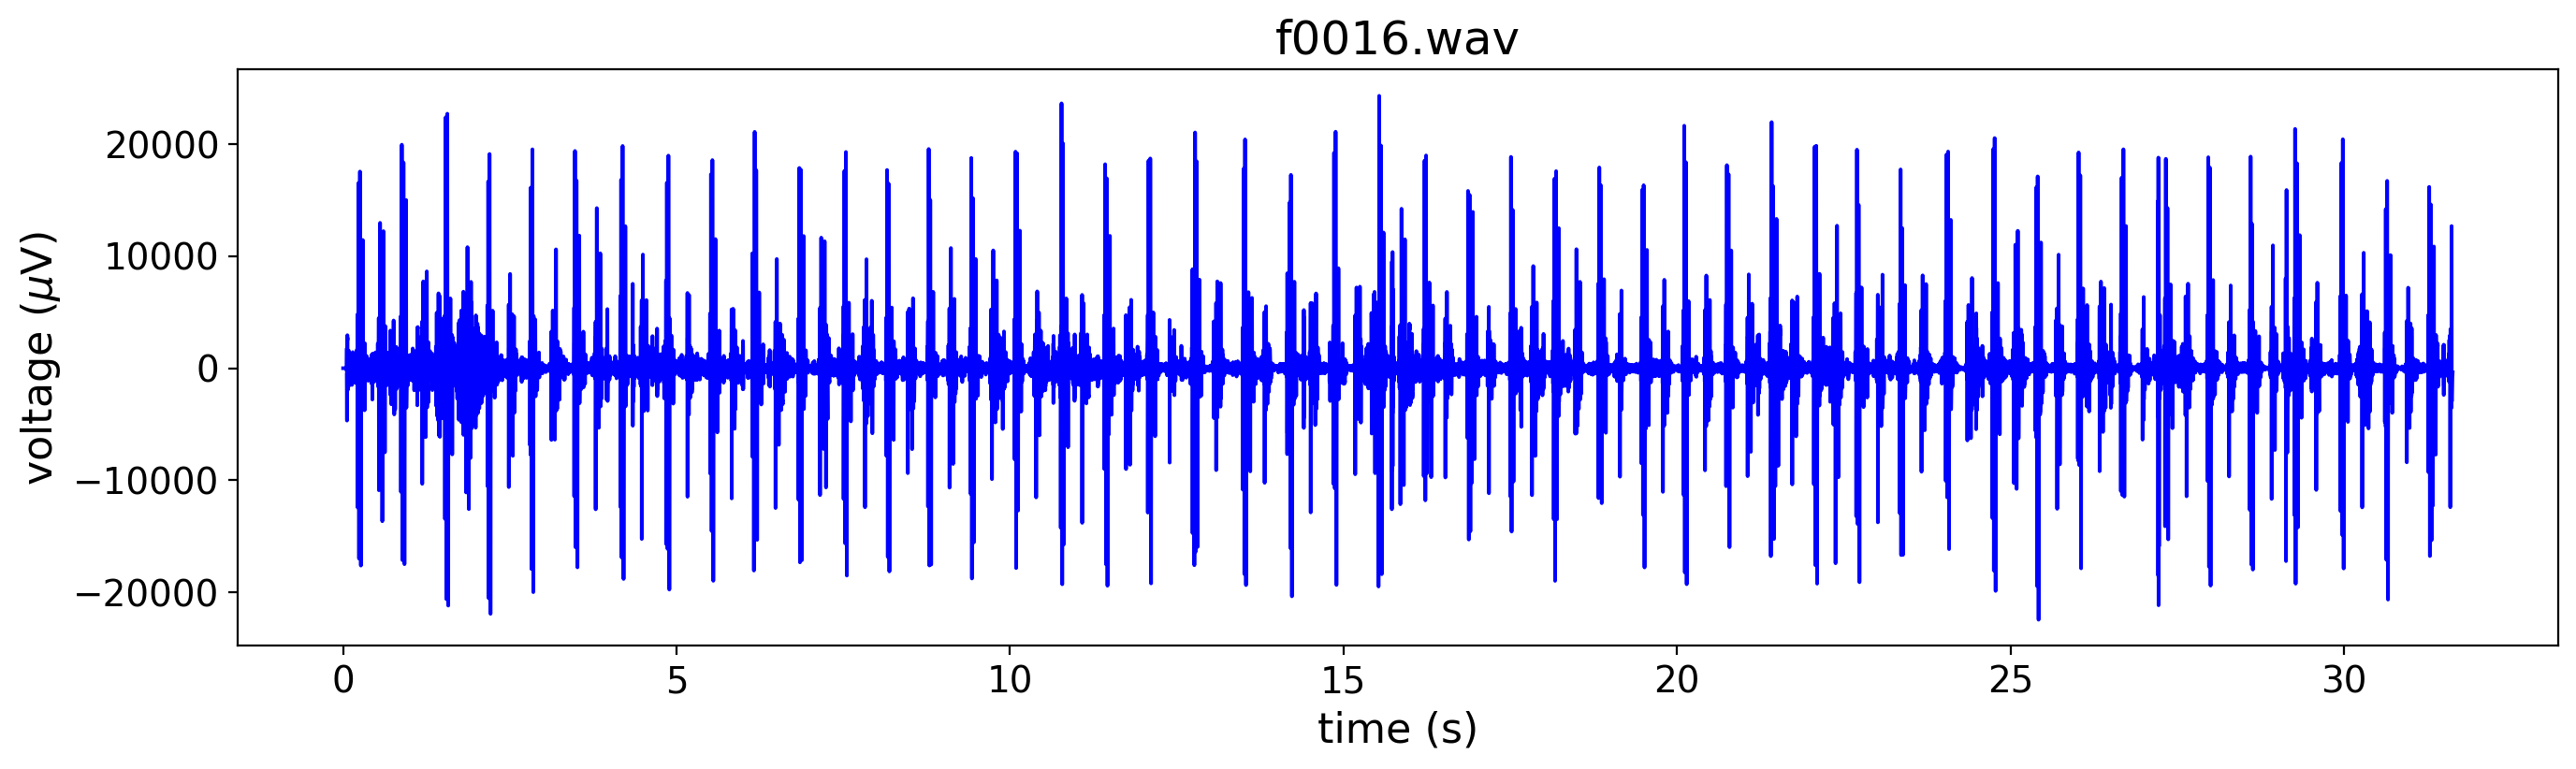

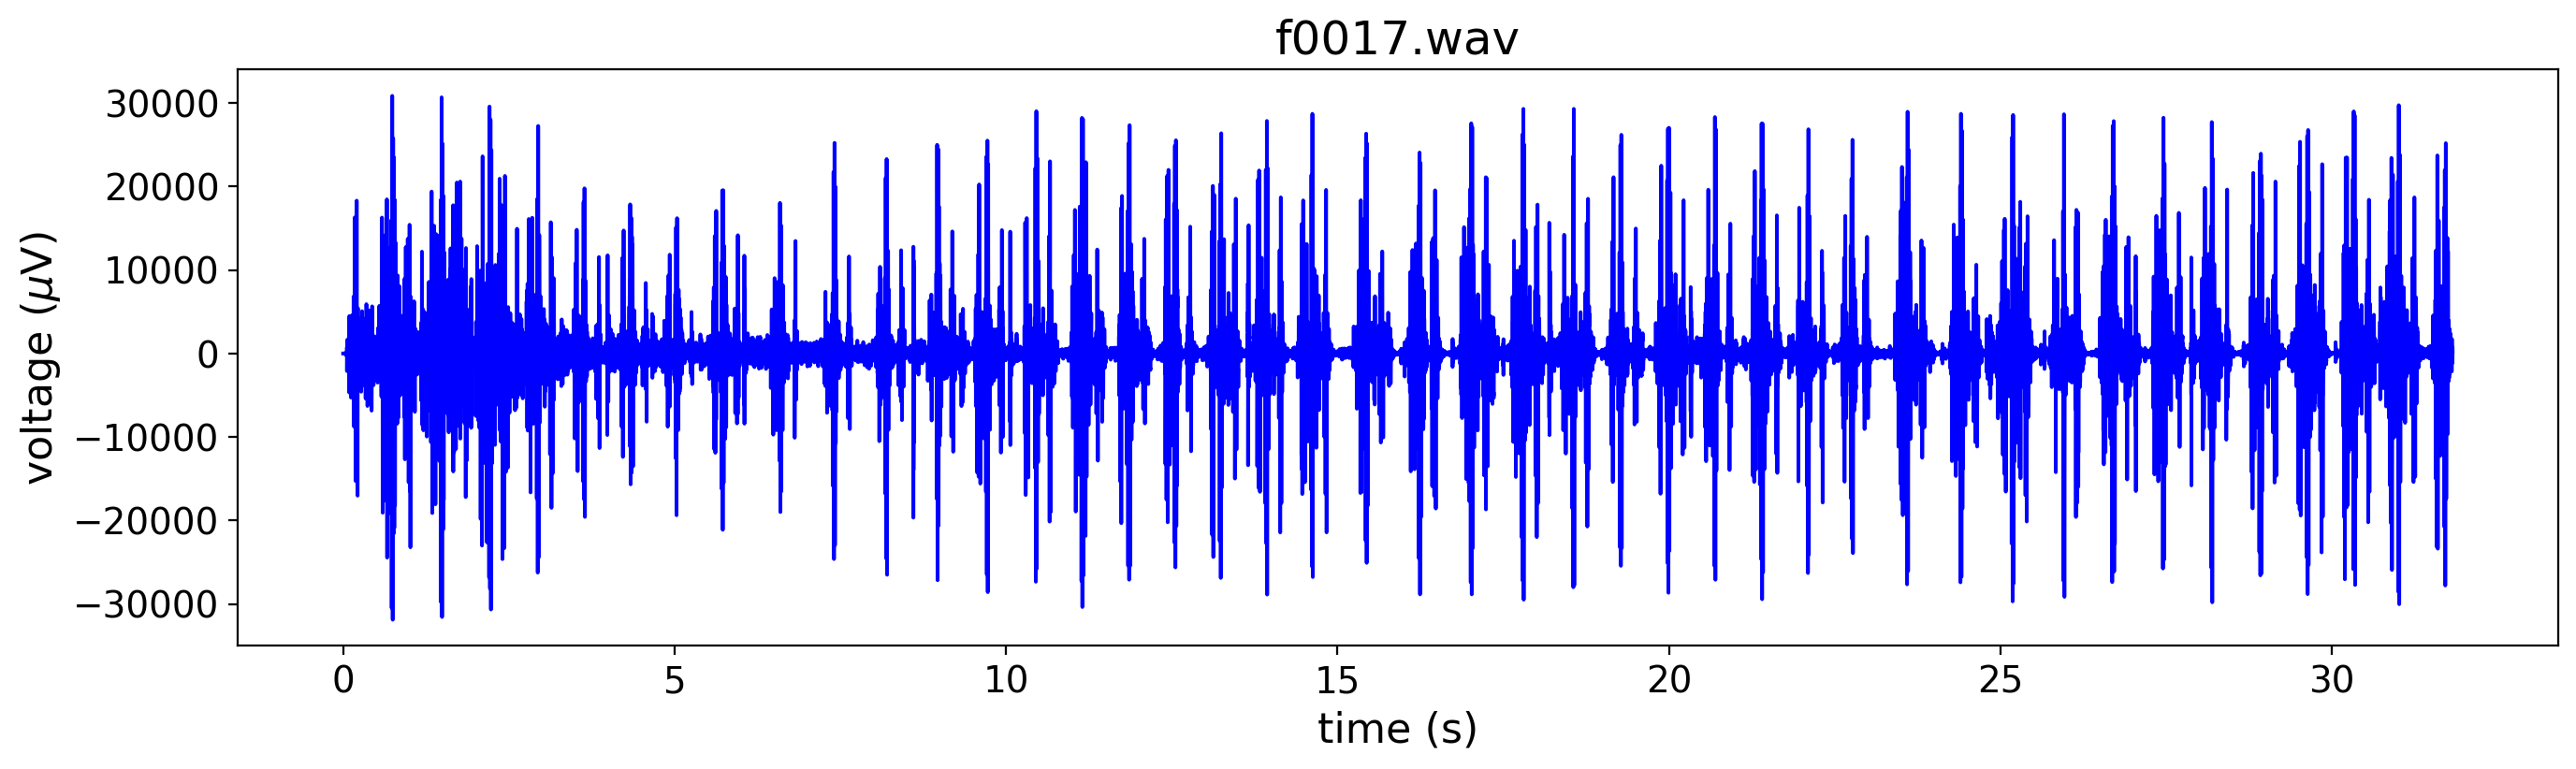

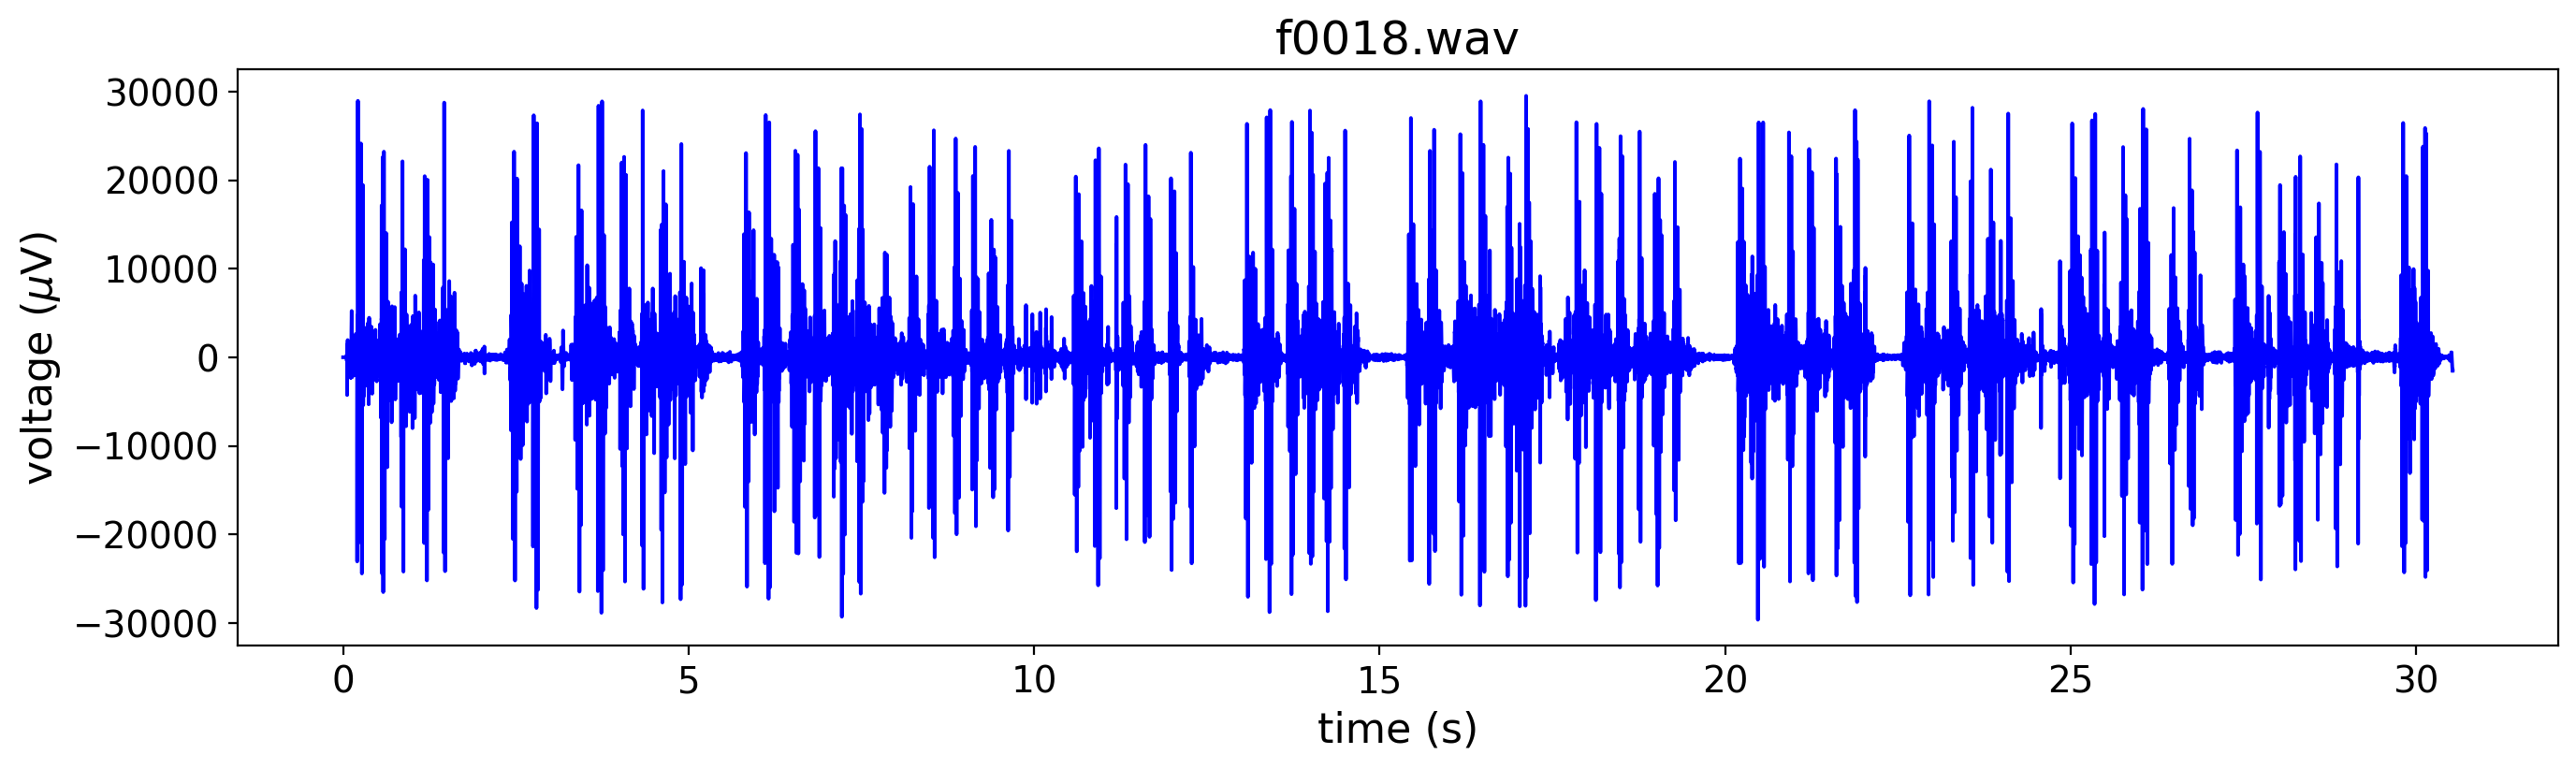

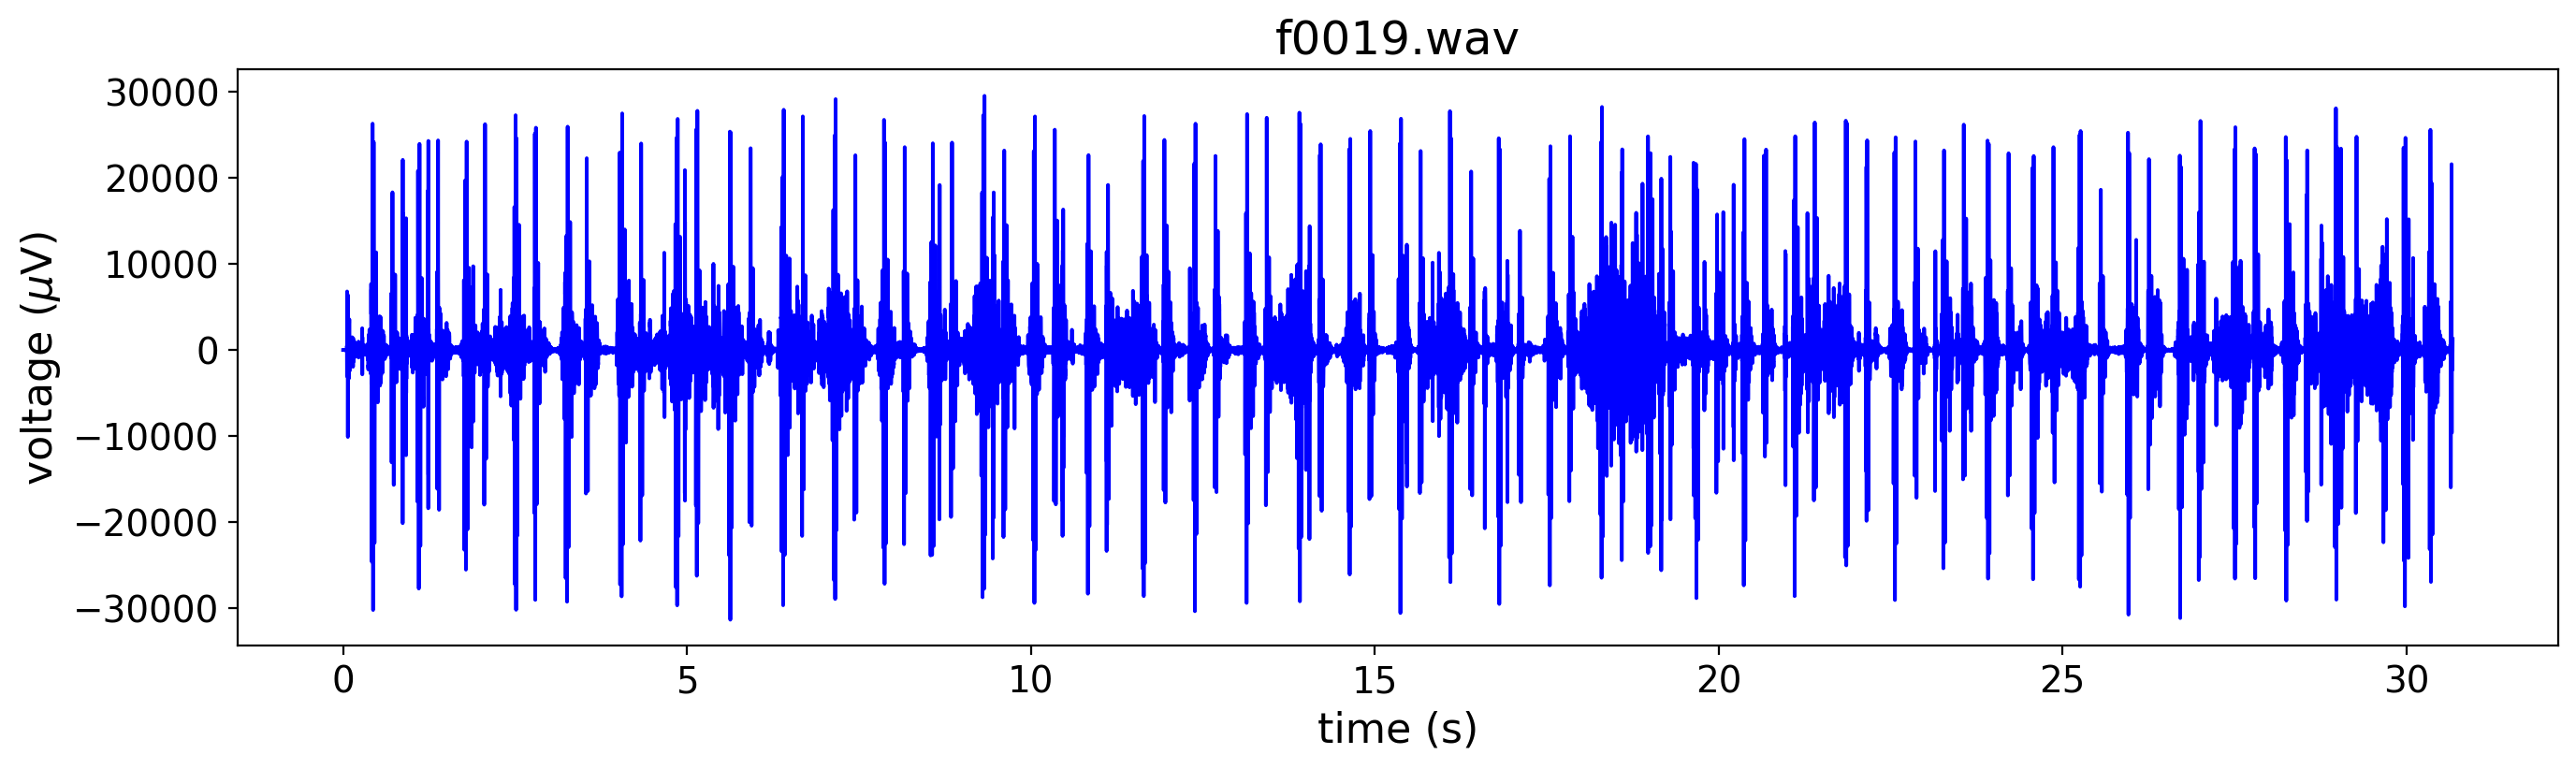

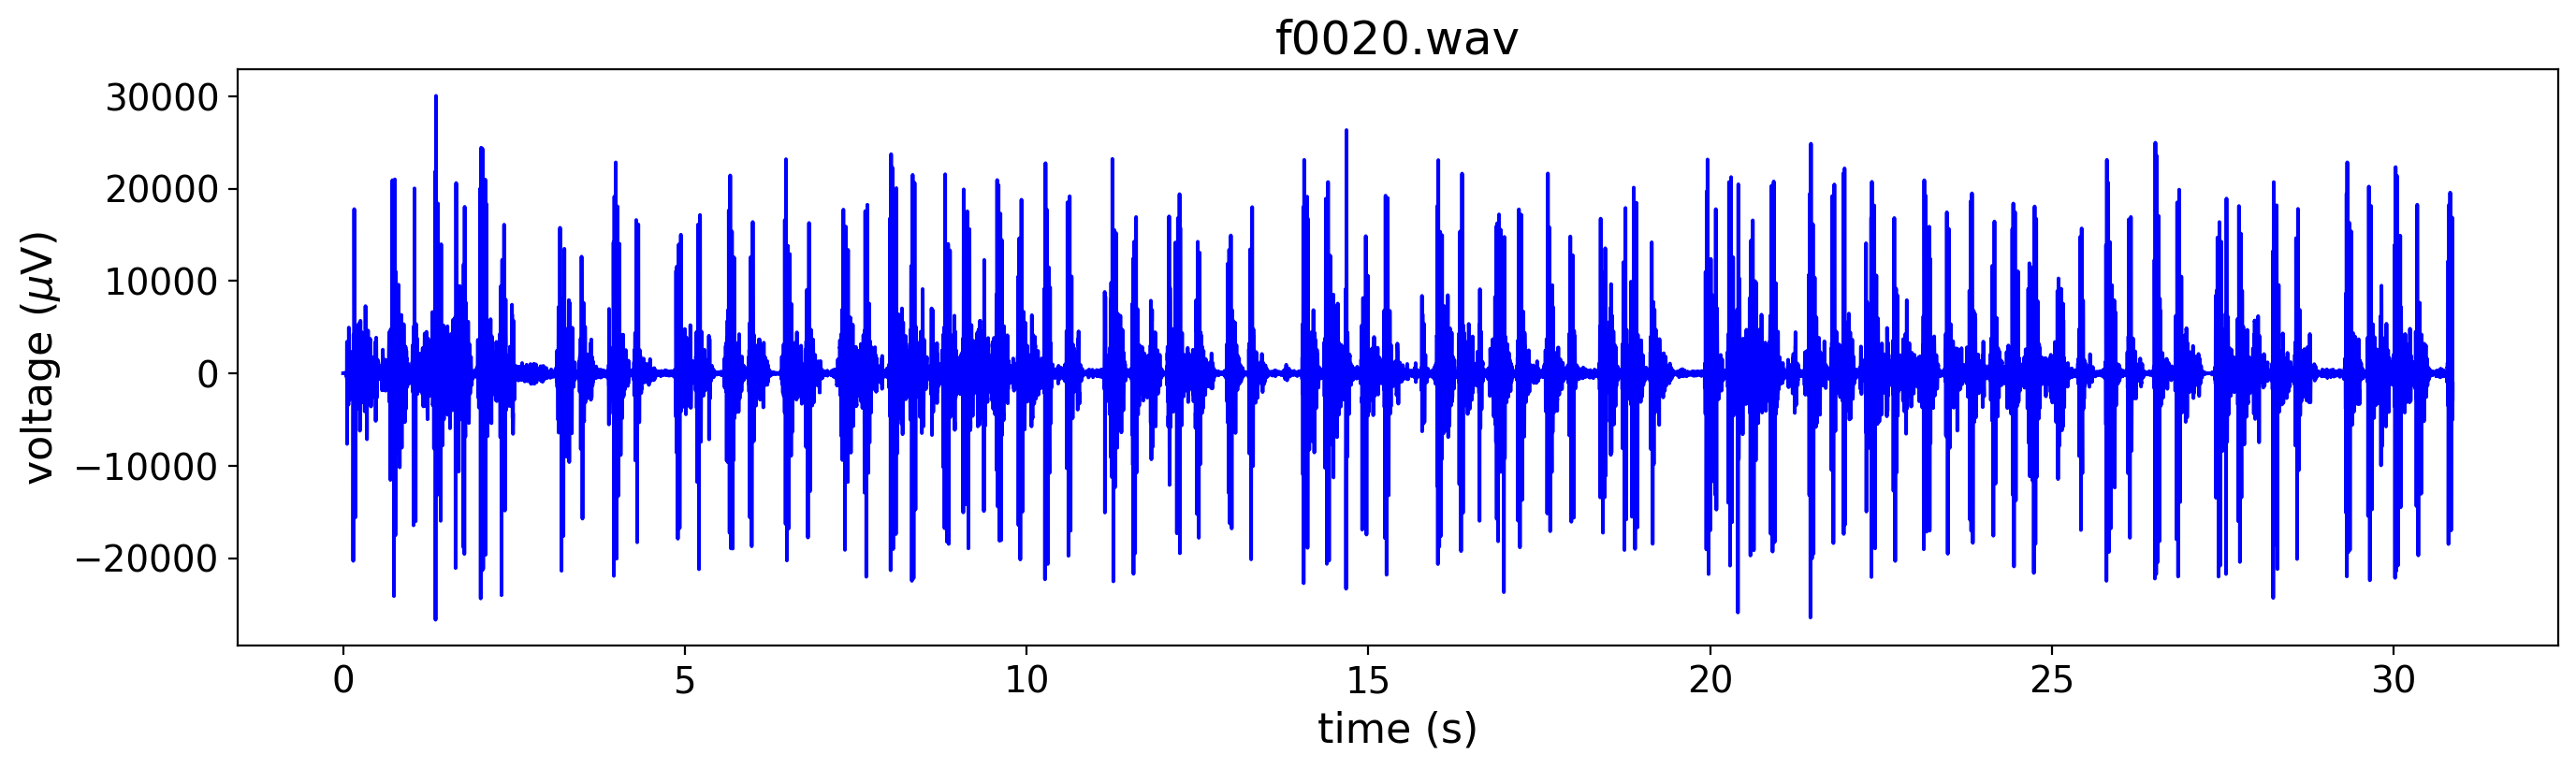

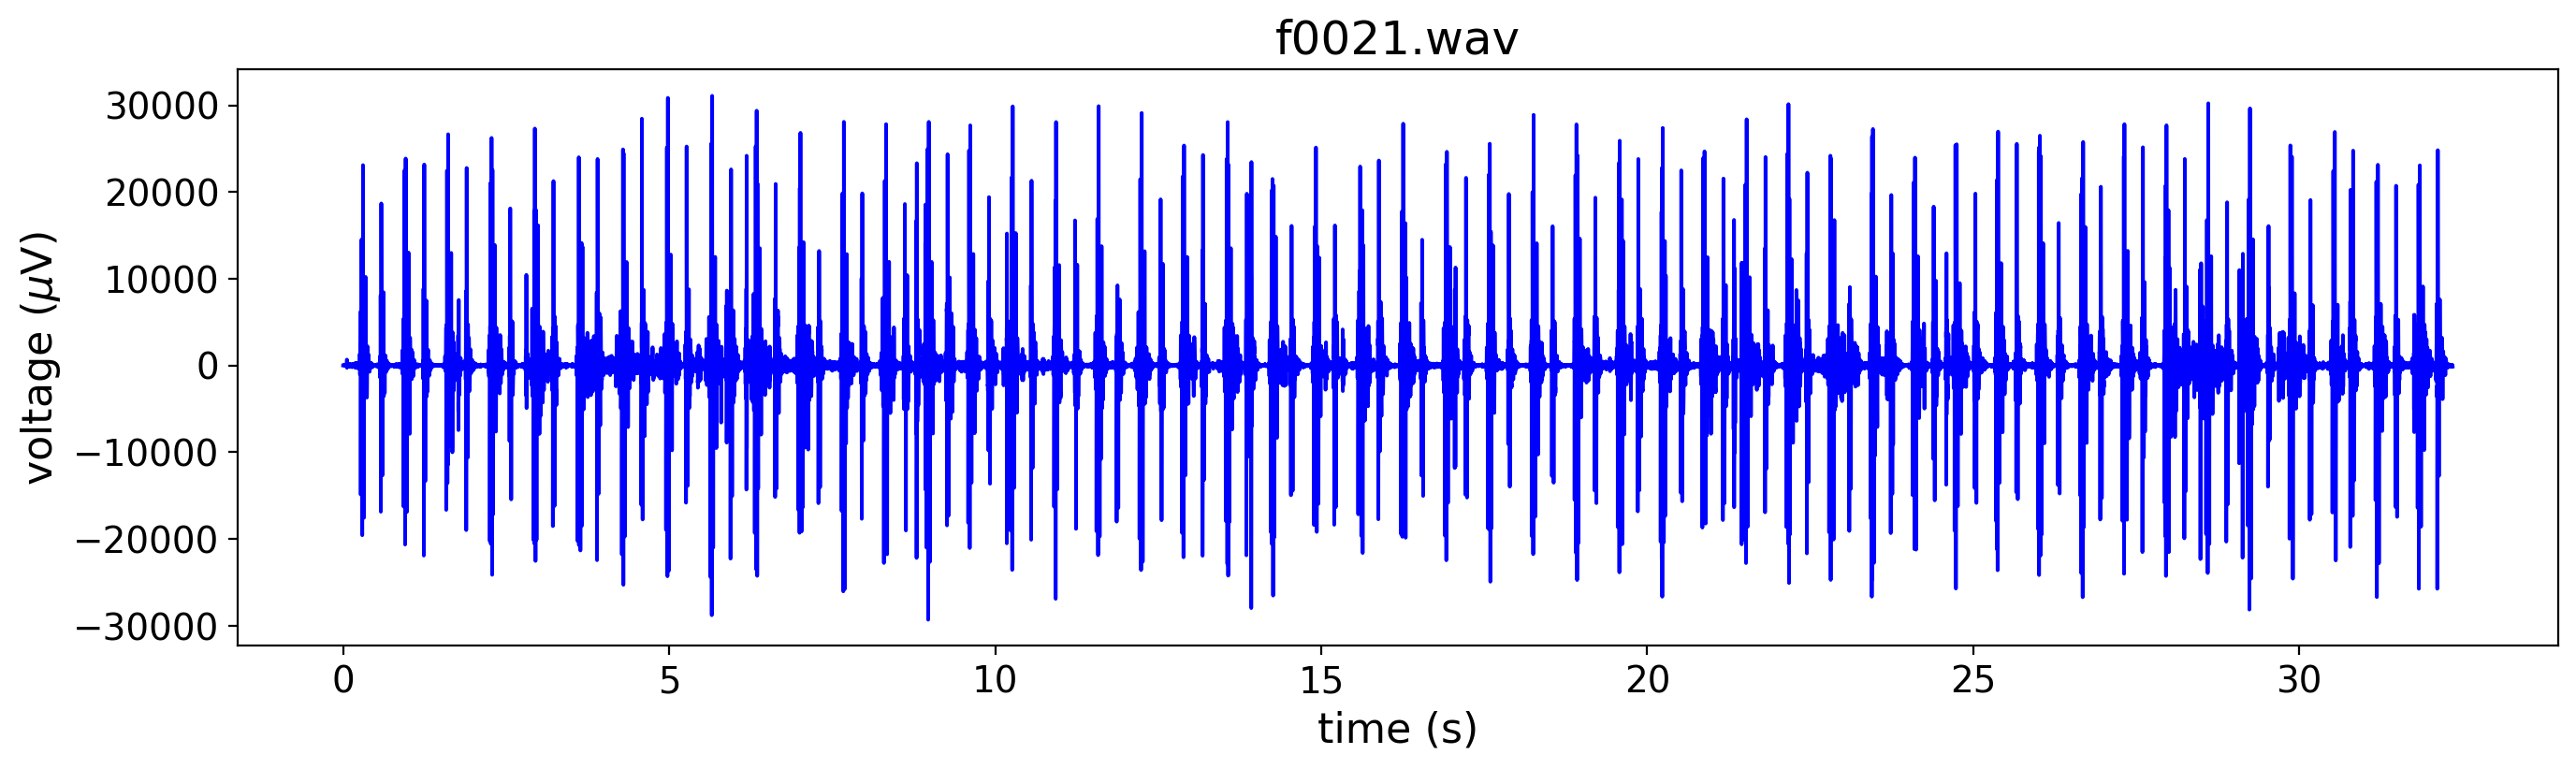

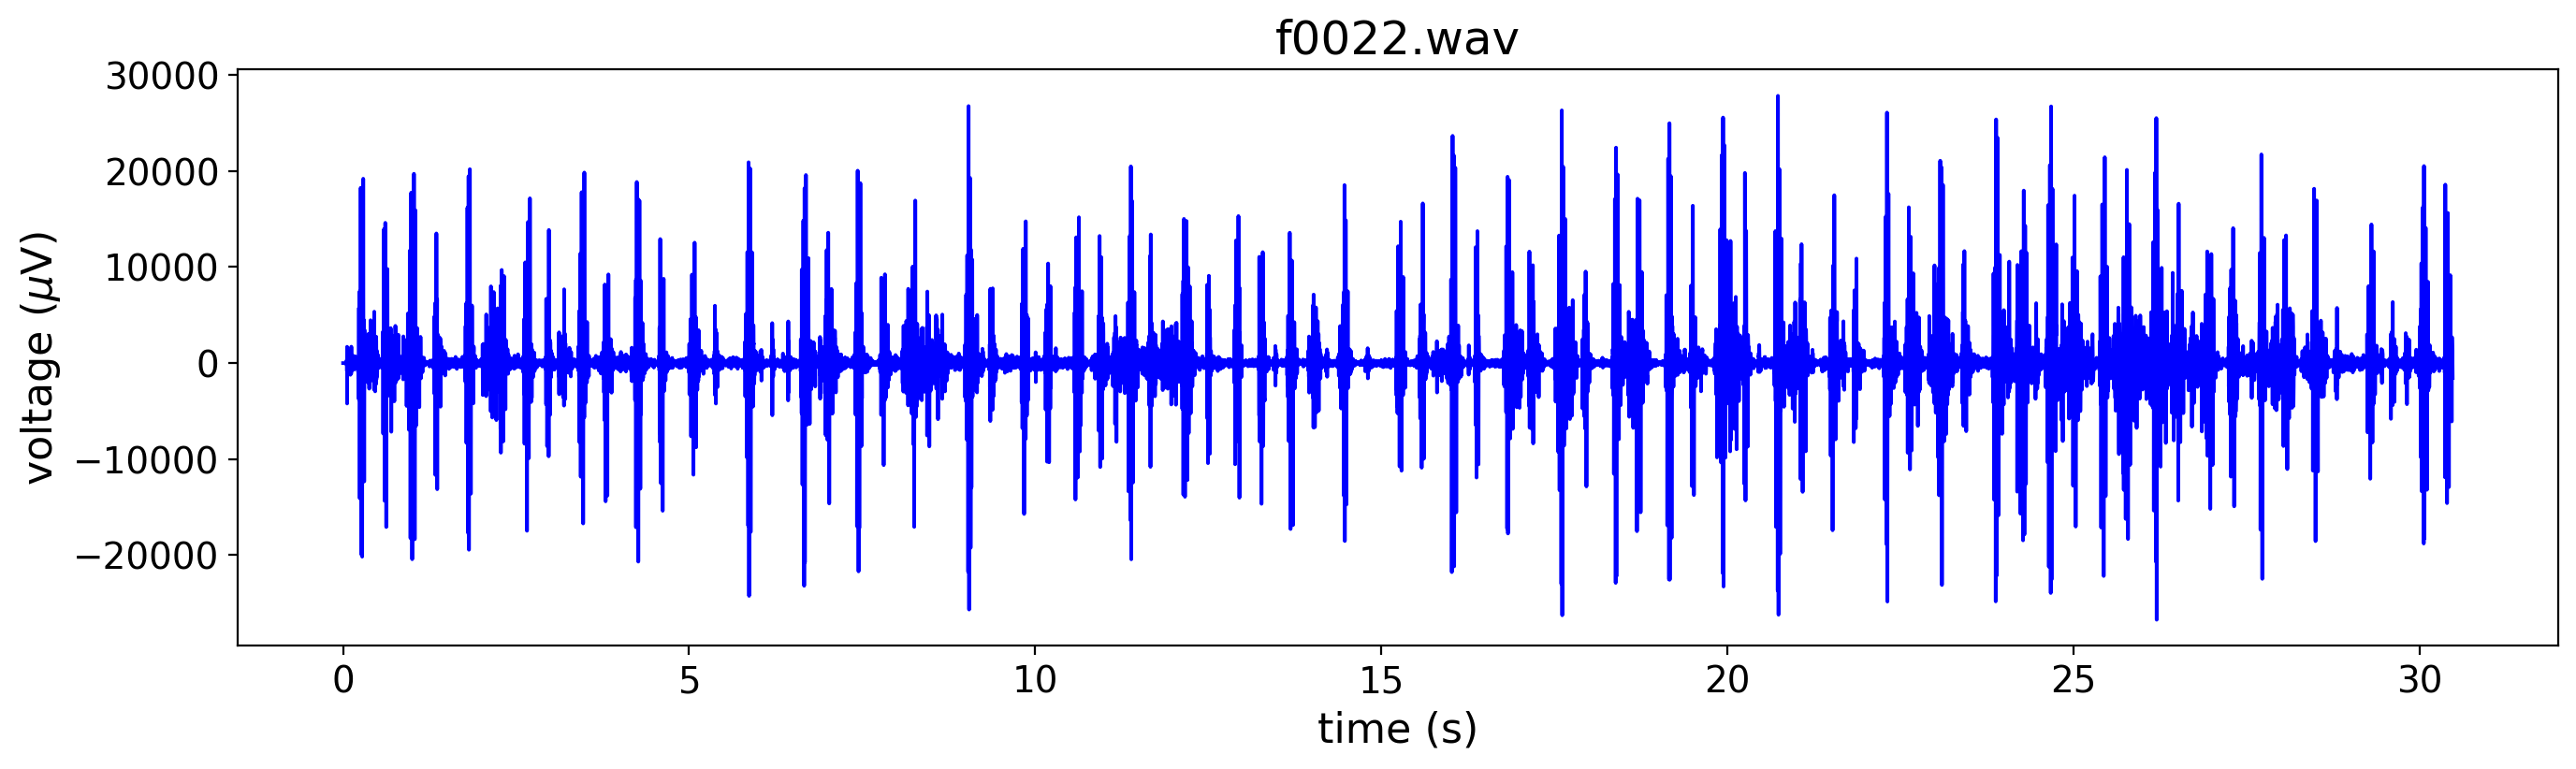

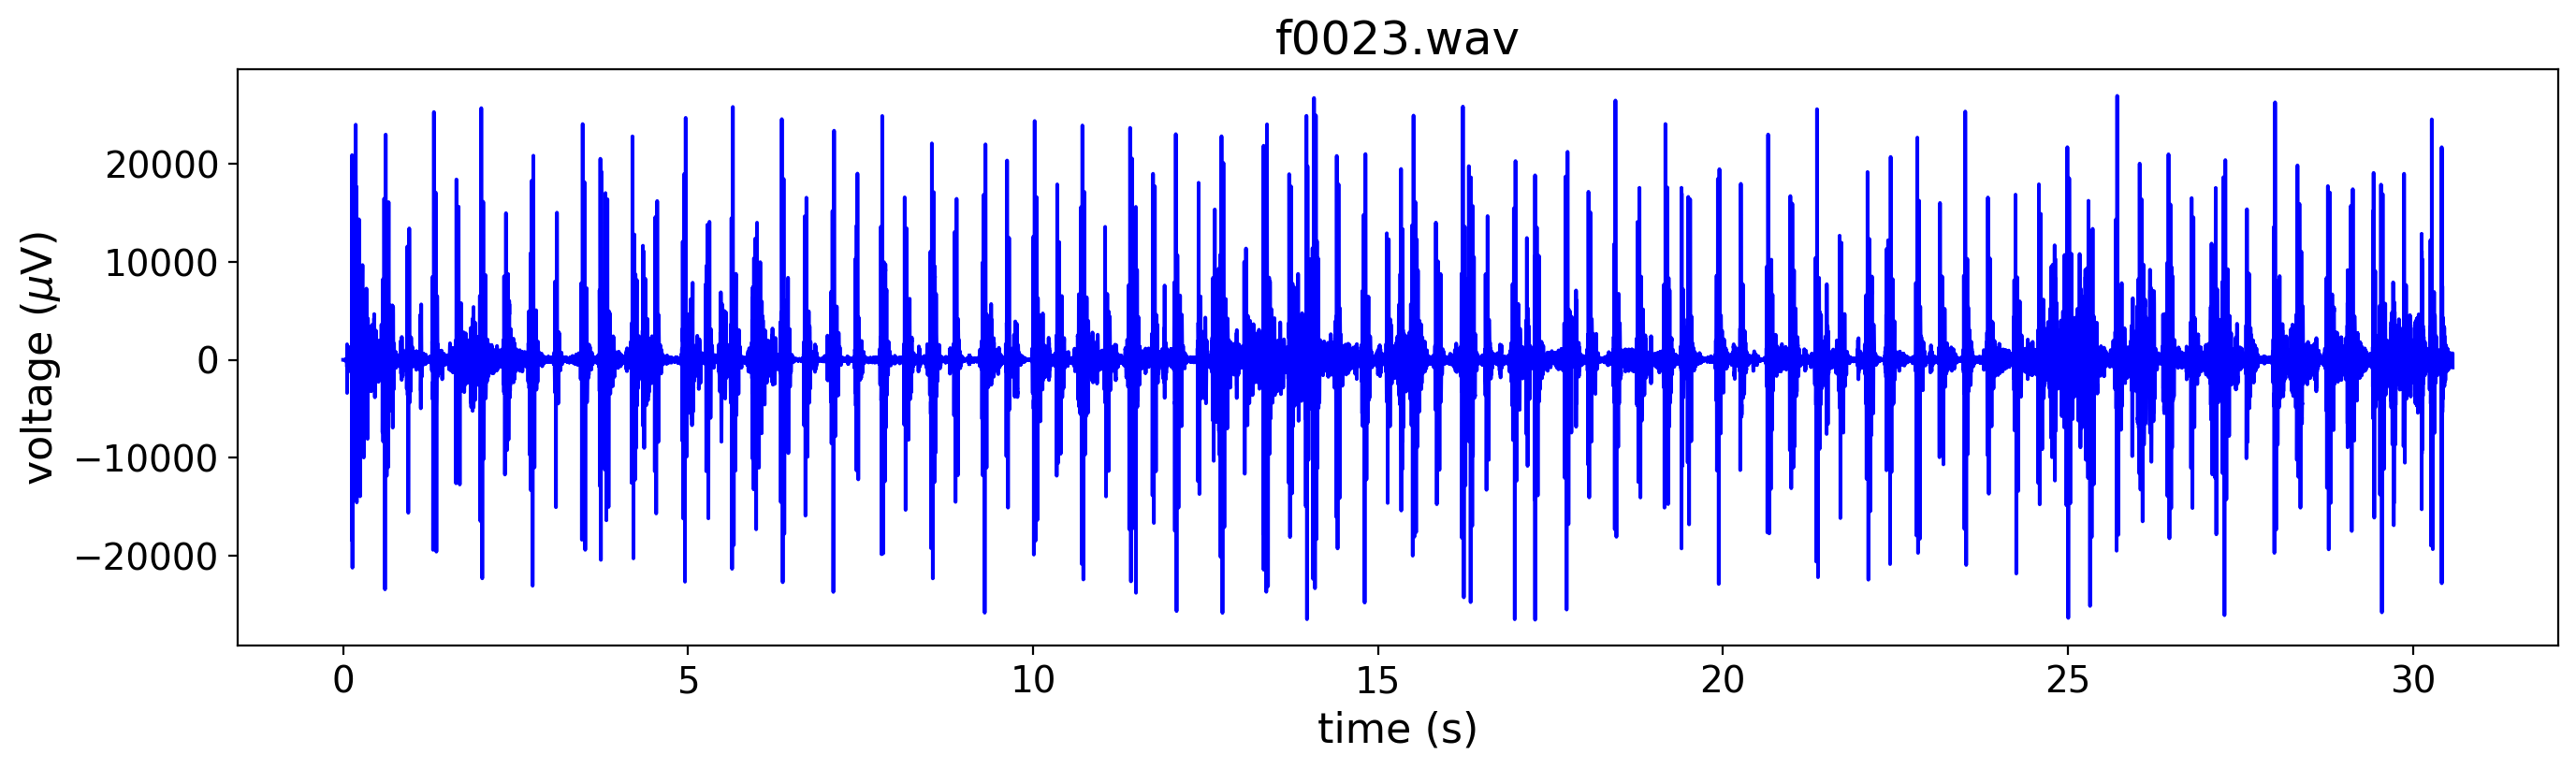

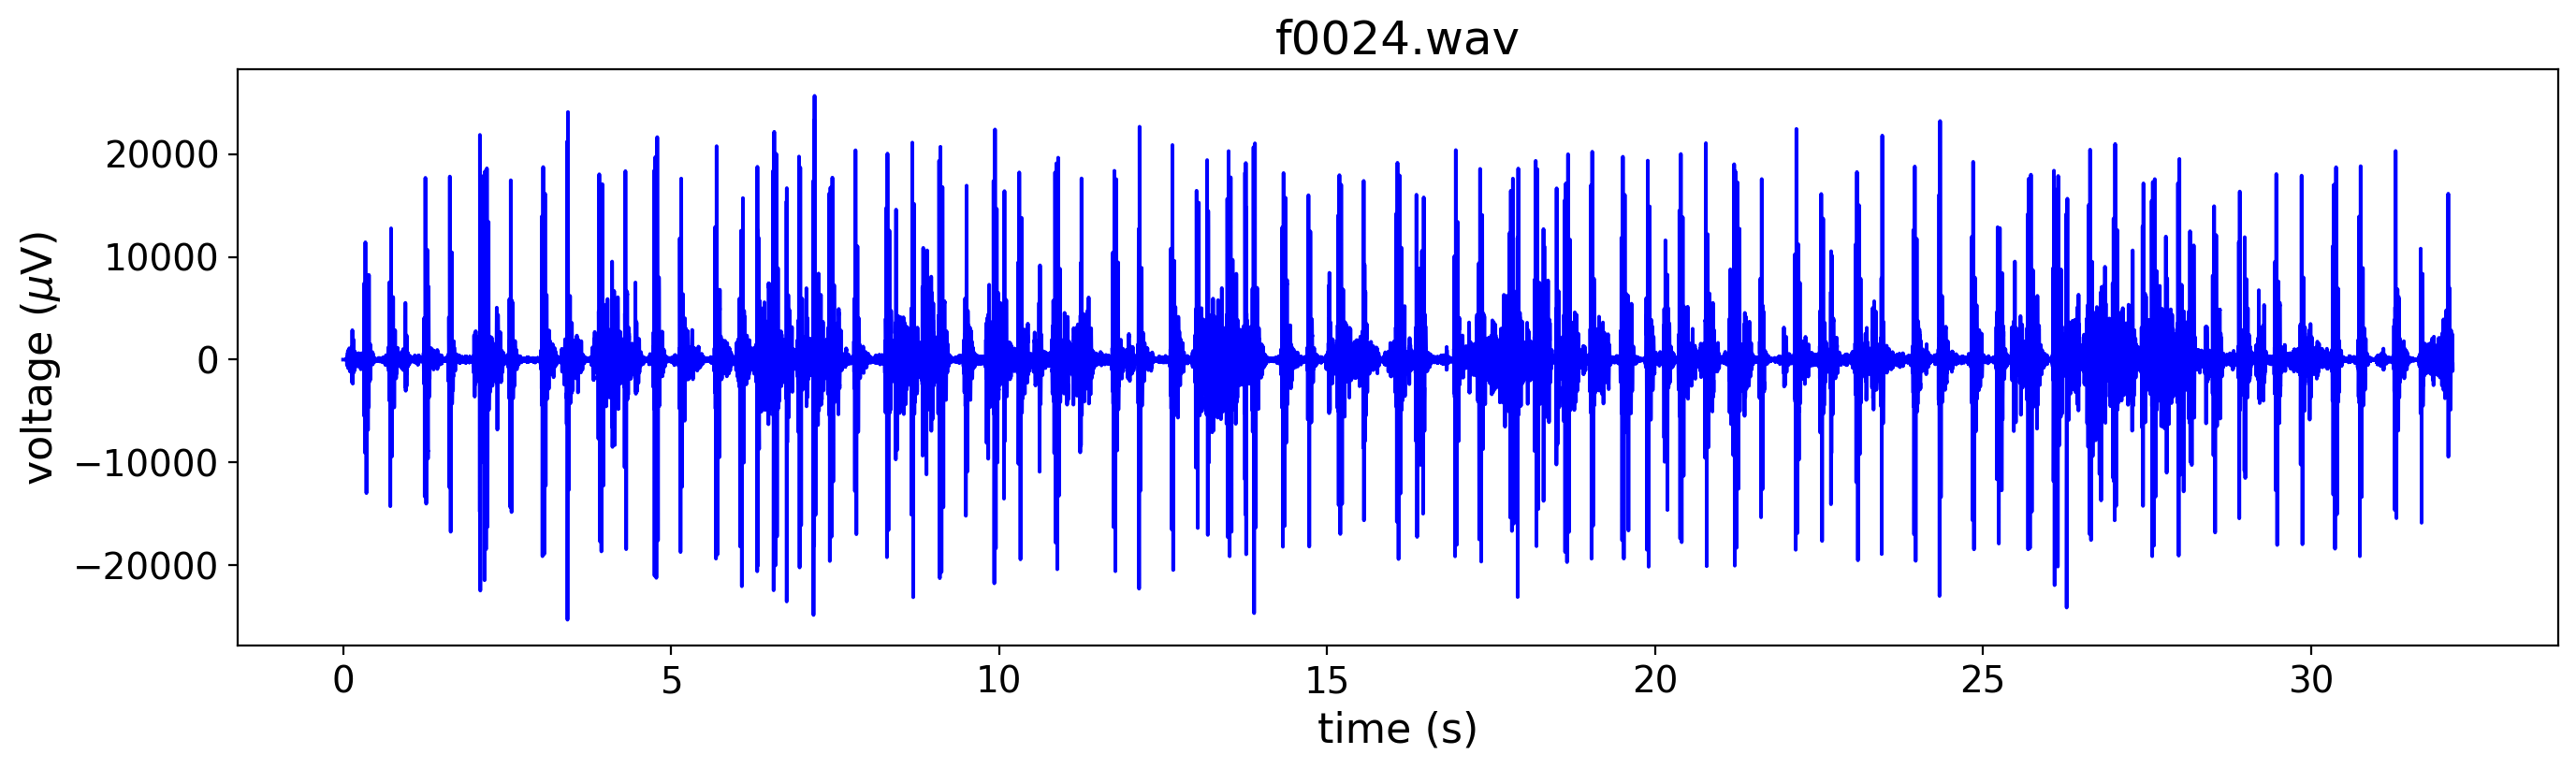

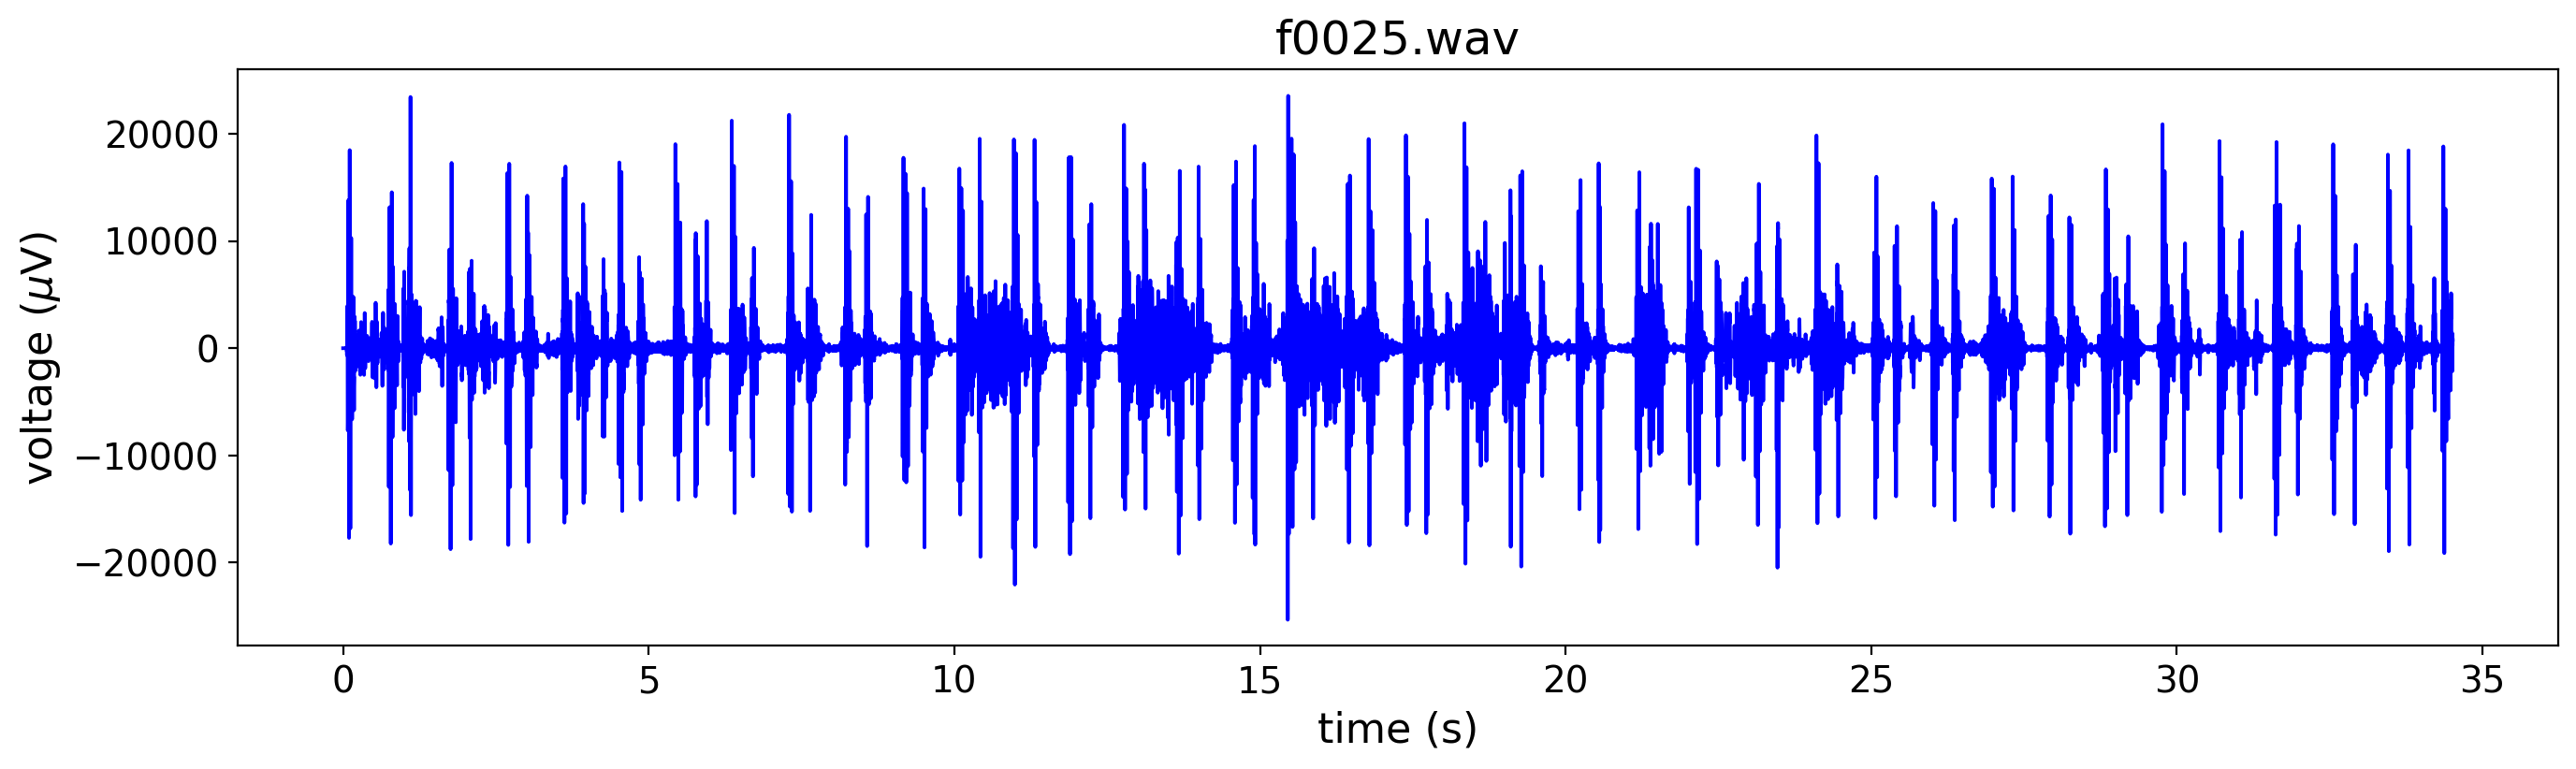

In [58]:
audios = rutaAudios()

for i in range(0, len(audios)):
    timeECG, waveData = ecg(audios[i])
    #Plotting EMG signal
    plt.figure(figsize=(16,4))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.title(audios[i])
    plt.show()

## Amplitud 

Ahora para calcular la magnitud de la amplitud máxima presente en estos archivos de audio, se procede 
a modificar ligeramente el código de la funcion #def ecg(variable). Considere que se calculará la amplitud máxima, la amplitud promedio máxima,el valor RMS máximo de los archivos y el nombre del archivo correspondiente a cada item.

In [59]:
#Función que extrae el número de canales de grabación, frecuencia de muestreo, tiempo y señal y retorna amplitud máxima
#variable es el nombre del archivo (filename)
def amplitudMaxima(variable):
    record = wave.open(variable, 'r') # carga los datos

    # Se obtienen los parámetros.
    numChannels = record.getnchannels() #números de canales
    numFrames = record.getnframes() #números de frames
    sampleRate = record.getframerate() #frecuencia de muestreo
    sampleWidth = record.getsampwidth()
    

    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)
    
    amplitudMaxima = np.max(np.abs(waveData))
    
    amplitudProm = np.mean(np.abs(waveData))
    
    amplitudRMS = np.sqrt(np.mean(waveData ** 2))
    

    return amplitudMaxima,amplitudProm,amplitudRMS


amplitudMax = 0
amplitudProm = 0
amplitudRMS = 0

archivoMax = ""
archivoProm = ""
archivoRMS = ""


for filename in audios:
    result = amplitudMaxima(filename)
    amplitudMaxActual = result[0] 
    amplitudPromActual = result[1]
    amplitudRMSactual = result[2]
    
    if amplitudMaxActual > amplitudMax:
        amplitudMax = amplitudMaxActual
        archivoMax = filename
        
    if amplitudPromActual > amplitudProm:
        amplitudProm = amplitudPromActual
        archivoProm = filename 
    
    if amplitudRMSactual > amplitudRMS:
        amplitudRMS = amplitudRMSactual
        archivoRMS  = filename 

print("El archivo con amplitud máxima es el: ",archivoMax, "con un valor de: ", amplitudMax,"µV" )
print()
print("El archivo con amplitud promedio mayor es el: ",archivoProm, "con un valor de: ", amplitudProm , "µV")
print()
print("El archivo con amplitud RMS mayor es el: ",archivoRMS, "con un valor de: ", amplitudRMS, "µV")

El archivo con amplitud máxima es el:  f0017.wav con un valor de:  31897 µV

El archivo con amplitud promedio mayor es el:  f0018.wav con un valor de:  1985.737241221174 µV

El archivo con amplitud RMS mayor es el:  f0010.wav con un valor de:  47.58517663495308 µV


## Visualización gráfica de uno y tres latidos del corazón




Se decide escoger el archivo f0014.wav. Se podría haber escogido cuanlquier otro audio, dado que el análisis es igual.

Primero se recorta el audio desde [0.04 , 4.5]s con el fin de observar con mayor claridad el comportamiento de las ondas y deducir cuanto tiempo corresponde a un latido respectivamente.

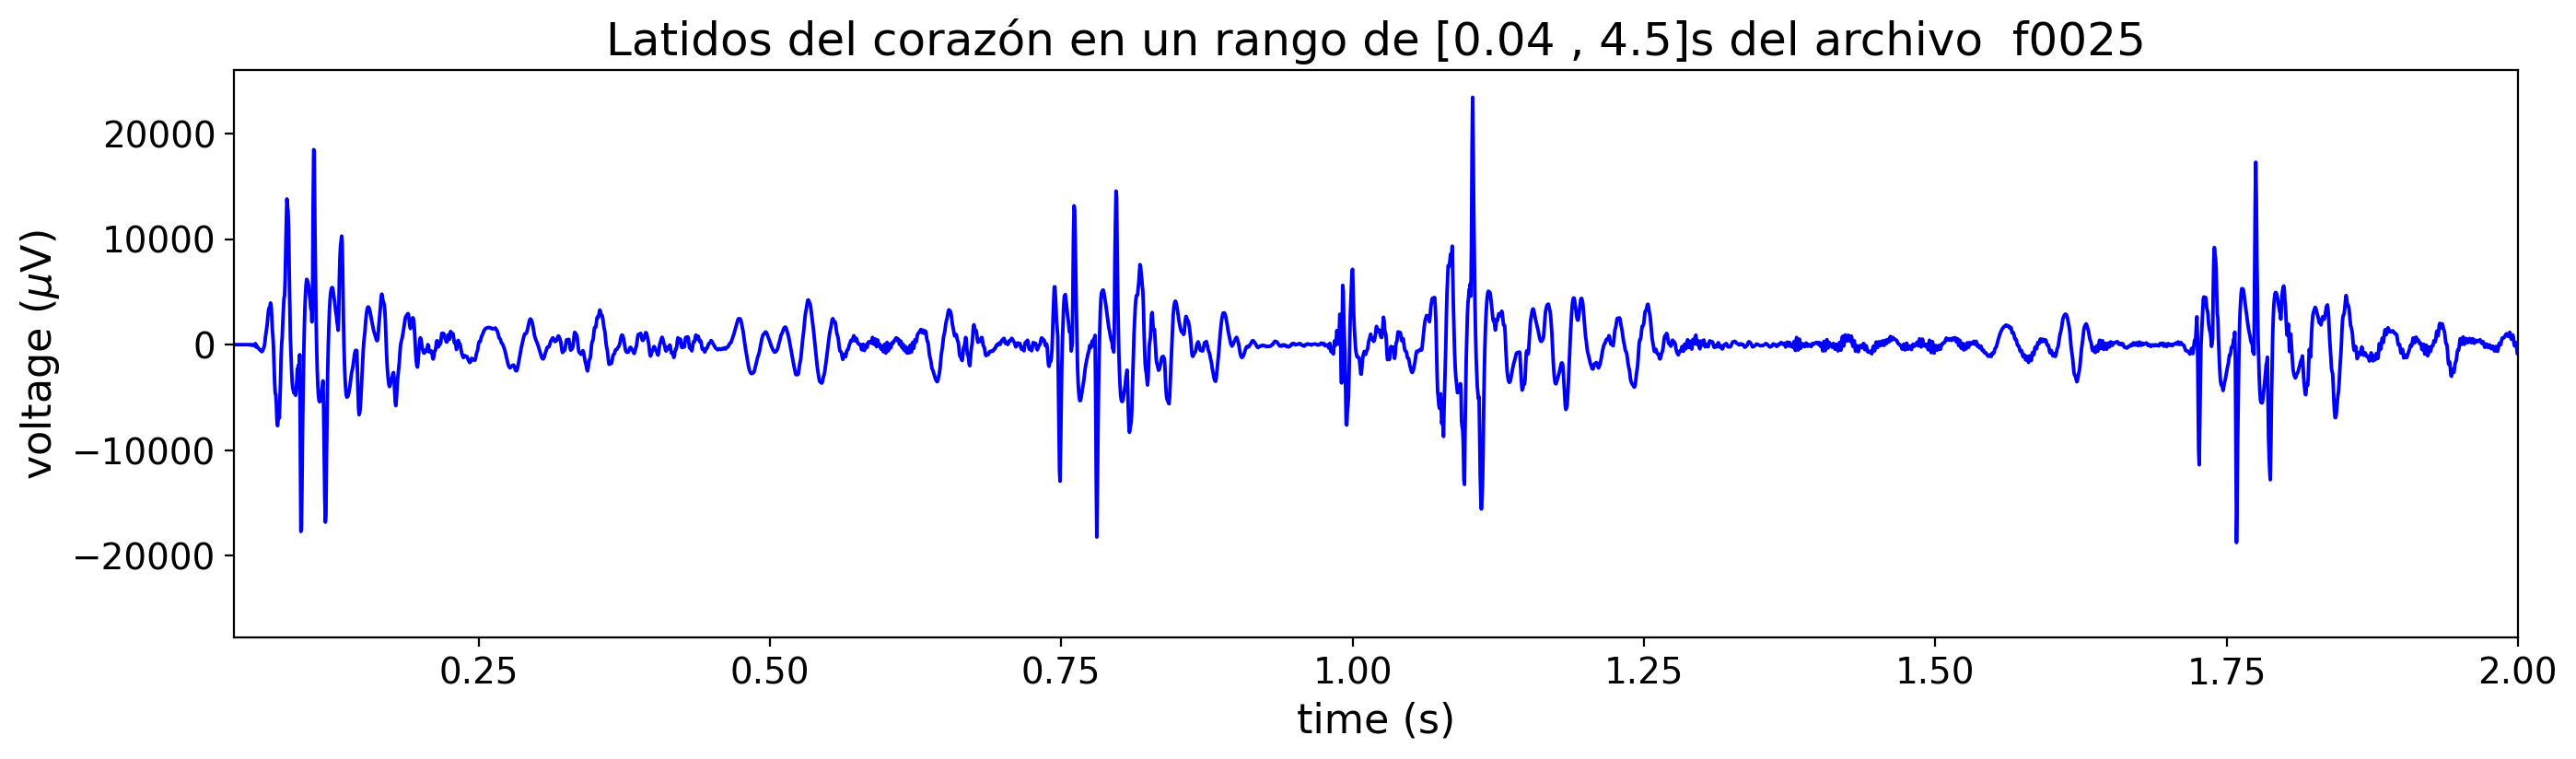

In [60]:

timeECG, waveData = ecg("f0025.wav")


plt.figure(figsize=(16,4))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(0.04,2)
plt.title("Latidos del corazón en un rango de [0.04 , 4.5]s del archivo  f0025")
plt.show()

De la gráfica anterior y escuchando el audio se determina que la duración de un latido del corazon es de aproximadamente 1s. Así, la gráfica correspondiente a un latido del corazón es la siguiente:

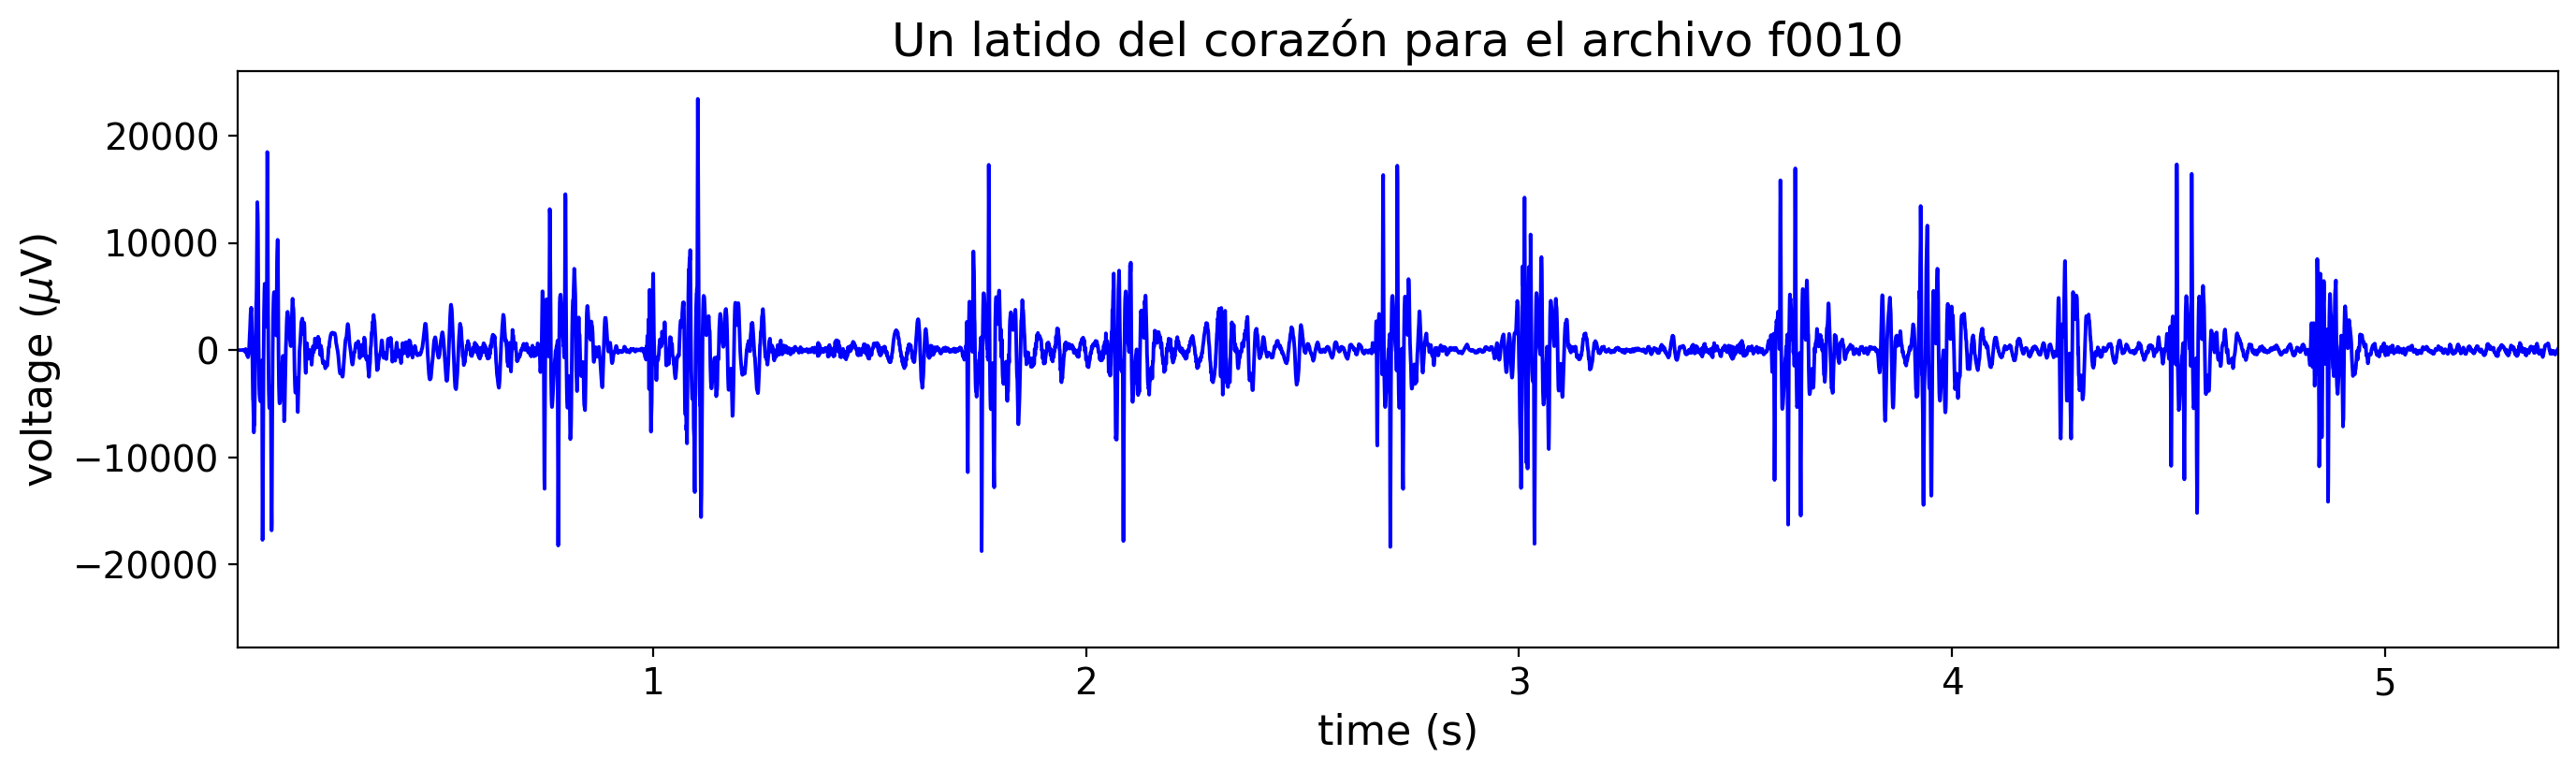

In [61]:
timeECG, waveData = ecg("f0025.wav")


plt.figure(figsize=(16,4))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(0.04,5.4)
plt.title("Un latido del corazón para el archivo f0010")
plt.show()

Luego, para 3 latidos, dada la estimación anterior se tiene que la gráfica corresponde a:

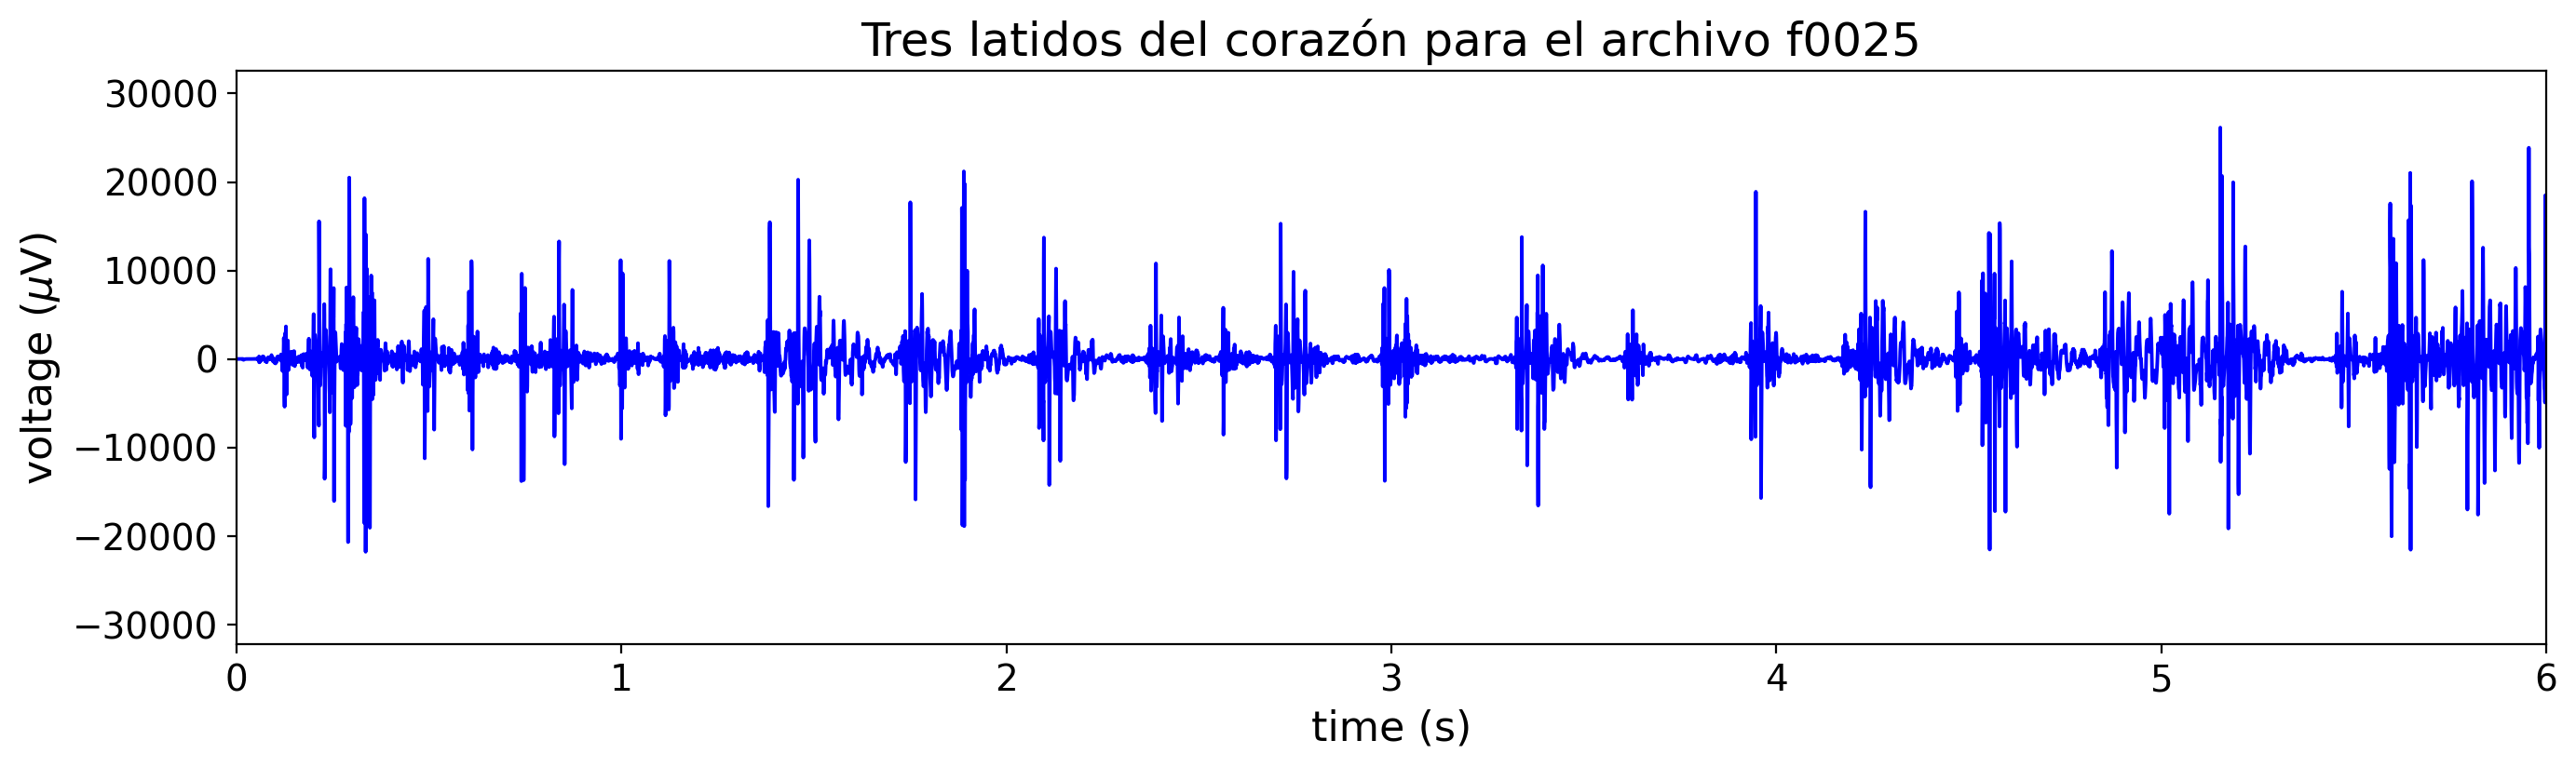

In [62]:
timeECG, waveData = ecg("f0011.wav")


plt.figure(figsize=(16,4))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(0,6)
plt.title("Tres latidos del corazón para el archivo f0025")
plt.show()

## Frecuencia estimada del pulso

De la estimación anterior, si se considera que el corazón late una vez cada segundo, con certeza se puede segurar que la frecuencia del pulso corresponde a 1 Hz.







# Segunda Parte del Proyecto

Para esta sección dada las características de las señales de audio se va a utilizar la siguiente 
fórmula para calcular la frecuencia cardíaca:  


F_cardiaca = NumerosPicos_R (durante 6s)* 10. 

Inicialmente se va a hacer el análisis para un señal de audio cualquiera, es decir el objetivo es que 
el método propuesto funcione para cualquier señal de audio de estas carácteristicas .

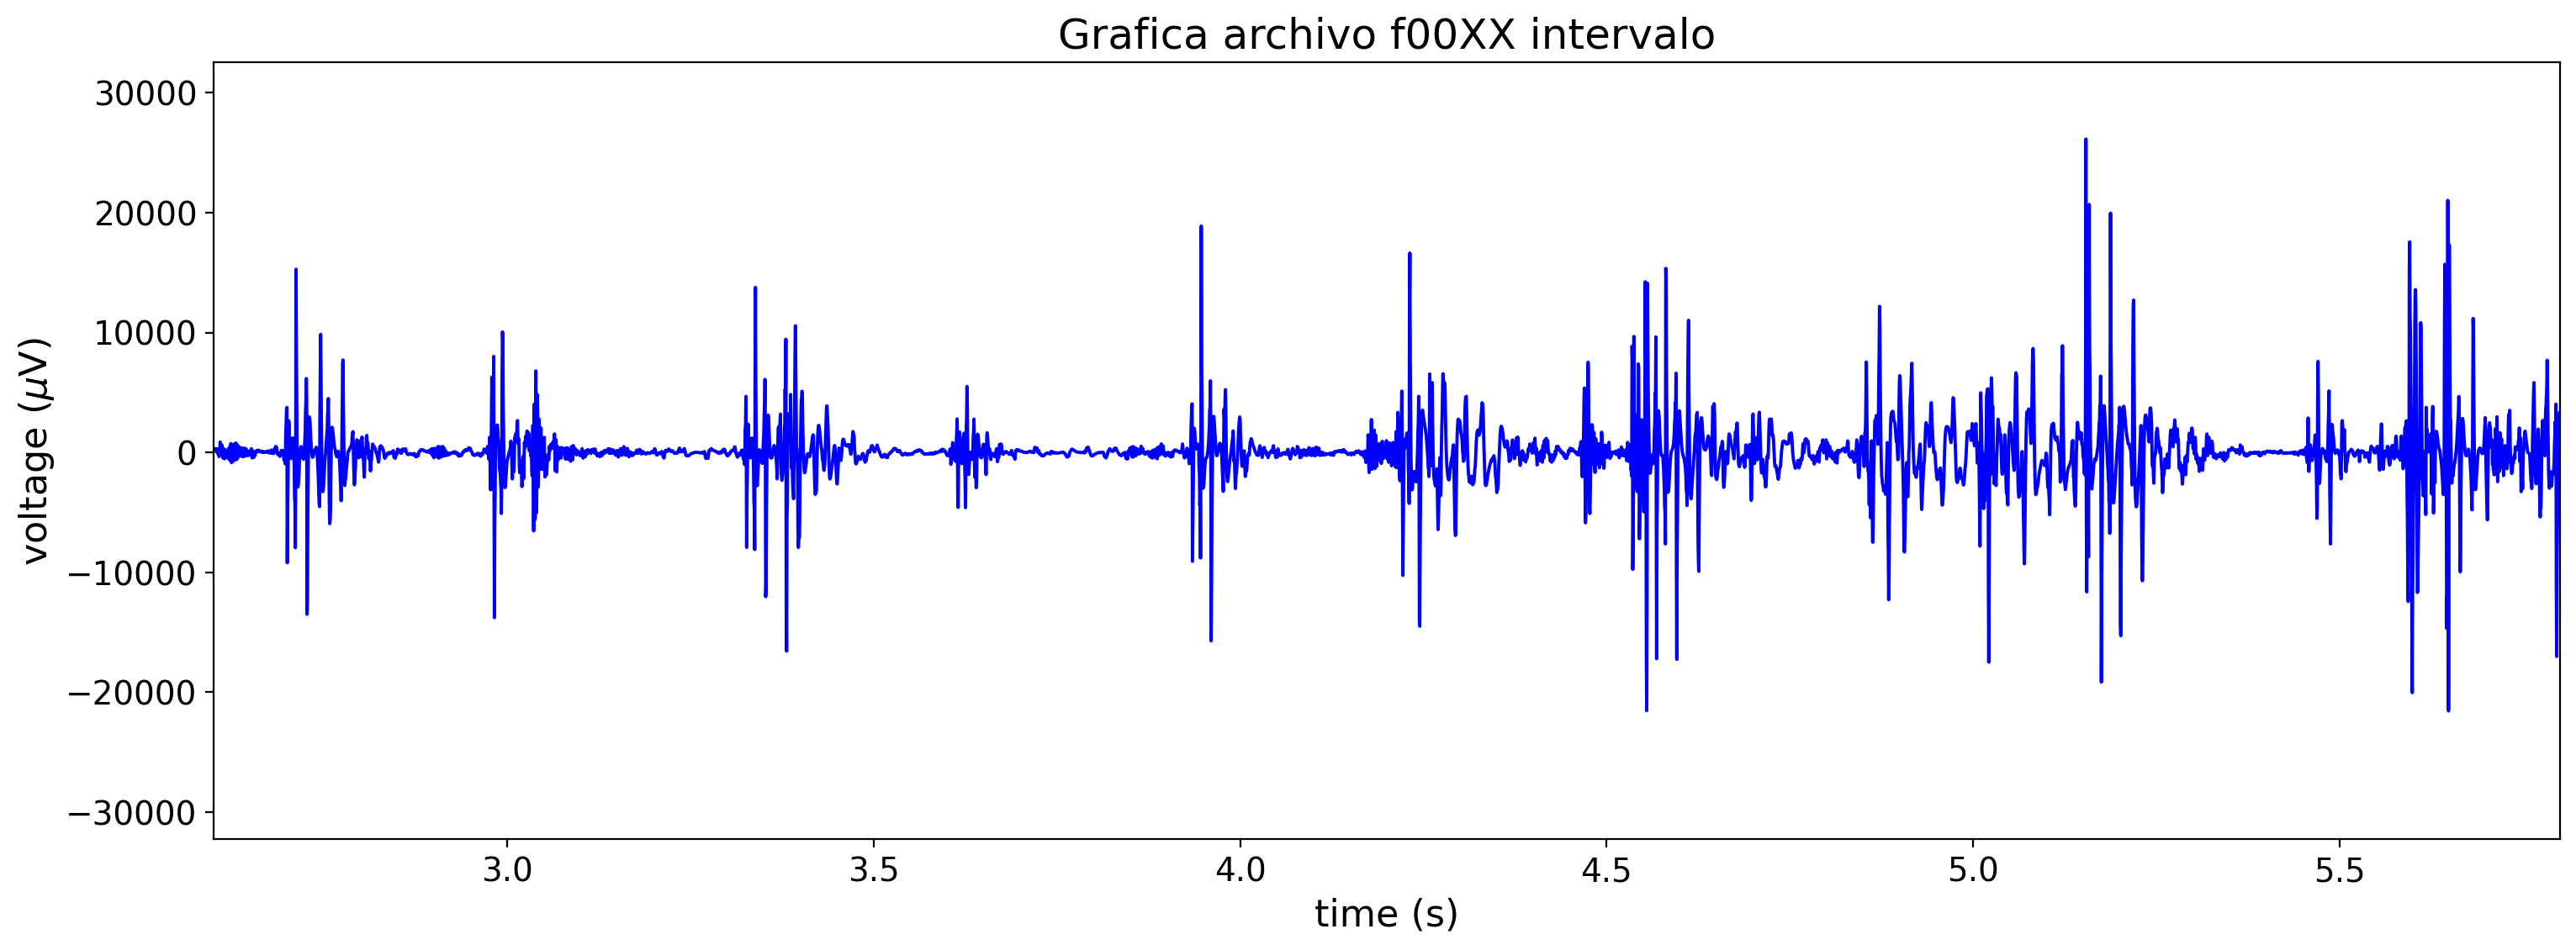

In [230]:
#Se obtienen los datos del archivo f00XX

timeECG, waveData = ecg("f0011.wav")

# Se grafican en un intervalo de tiempo pequeño para ver su comportamiento.
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(2.6,5.8)
plt.title("Grafica archivo f00XX intervalo")
plt.show()

Se calcula la tasa de muestreo para poder discretizar la senal y guardar los parámetros en las variables
timeECG, waveData

In [231]:

# Calcula la tasa de muestreo de la senal de audio dada

path_archivo = "f0011.wav"

# Abre el archivo de audio en modo lectura
with wave.open(path_archivo, 'rb') as archivo_audio:
    # Obtiene la tasa de muestreo del archivo de audio
    tasa_de_muestreo = archivo_audio.getframerate()

print("Tasa de muestreo: {} Hz".format(tasa_de_muestreo))

Tasa de muestreo: 2000 Hz


In [232]:
#Seconds at which we are going to cut the recording

# Se recorta la senal de audio para estudiarla en un rango mas pequeño, la idea es analizar algunos  de ciclos
# del ritmo cardiaco
n1 = .40
n2 = 15

m1 = int(n1*2000)
m2 = int(n2*2000)

#print (m1)
#print (m2)

print(timeECG[m1])
print(timeECG[m2])

0.40000335483221644
15.000125806208118


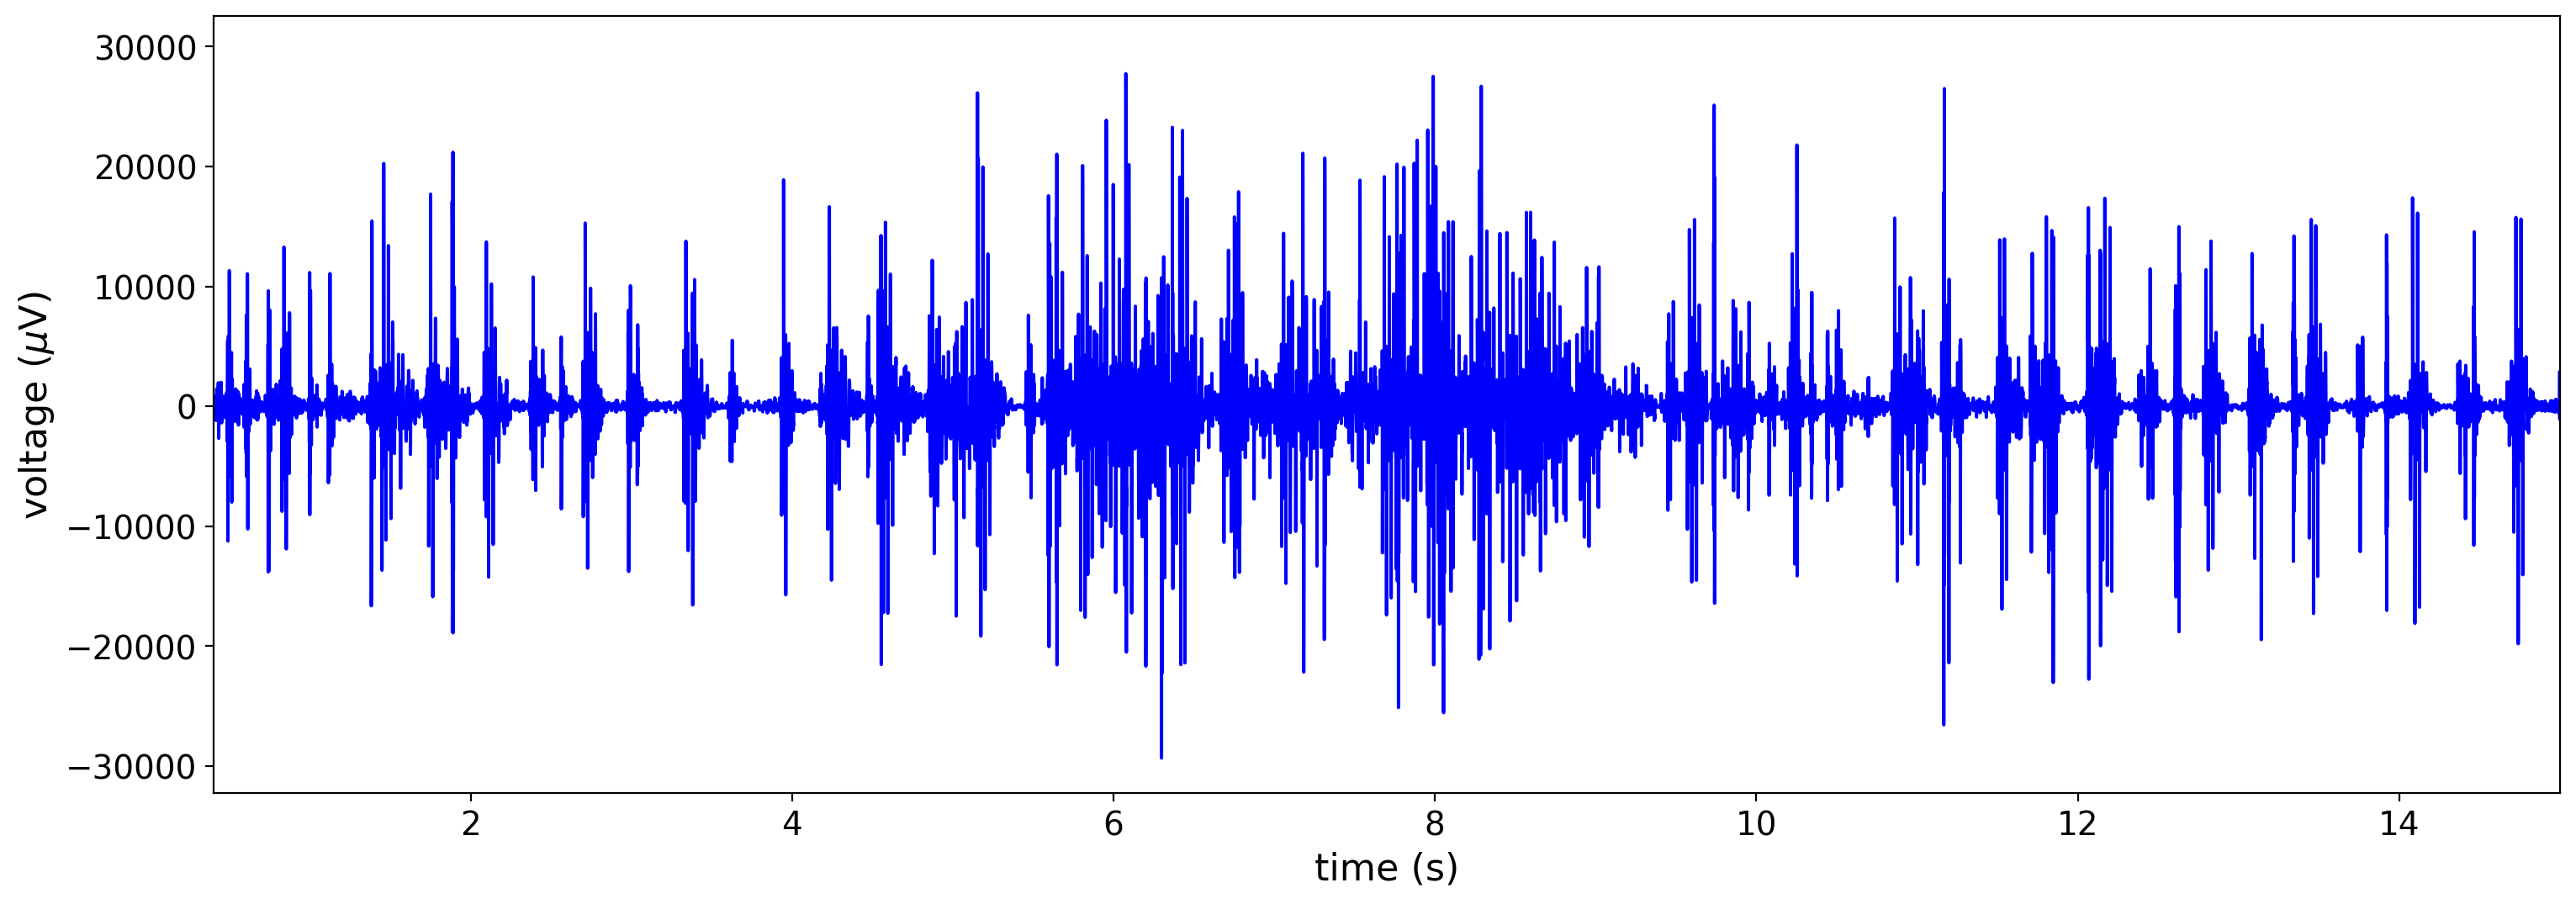

In [233]:
# Plotting EMG signal

# Se grafica la senal para el tiempo establecido anteriormente
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(timeECG[m1],timeECG[m2])
plt.show()

Una vez recortada la señal, se redefinen las variables timeECG, waveData para que solo se consideren los valores en el rango establecido anteriormente

In [234]:
timeECG, waveData = timeECG[m1:m2], waveData[m1:m2]


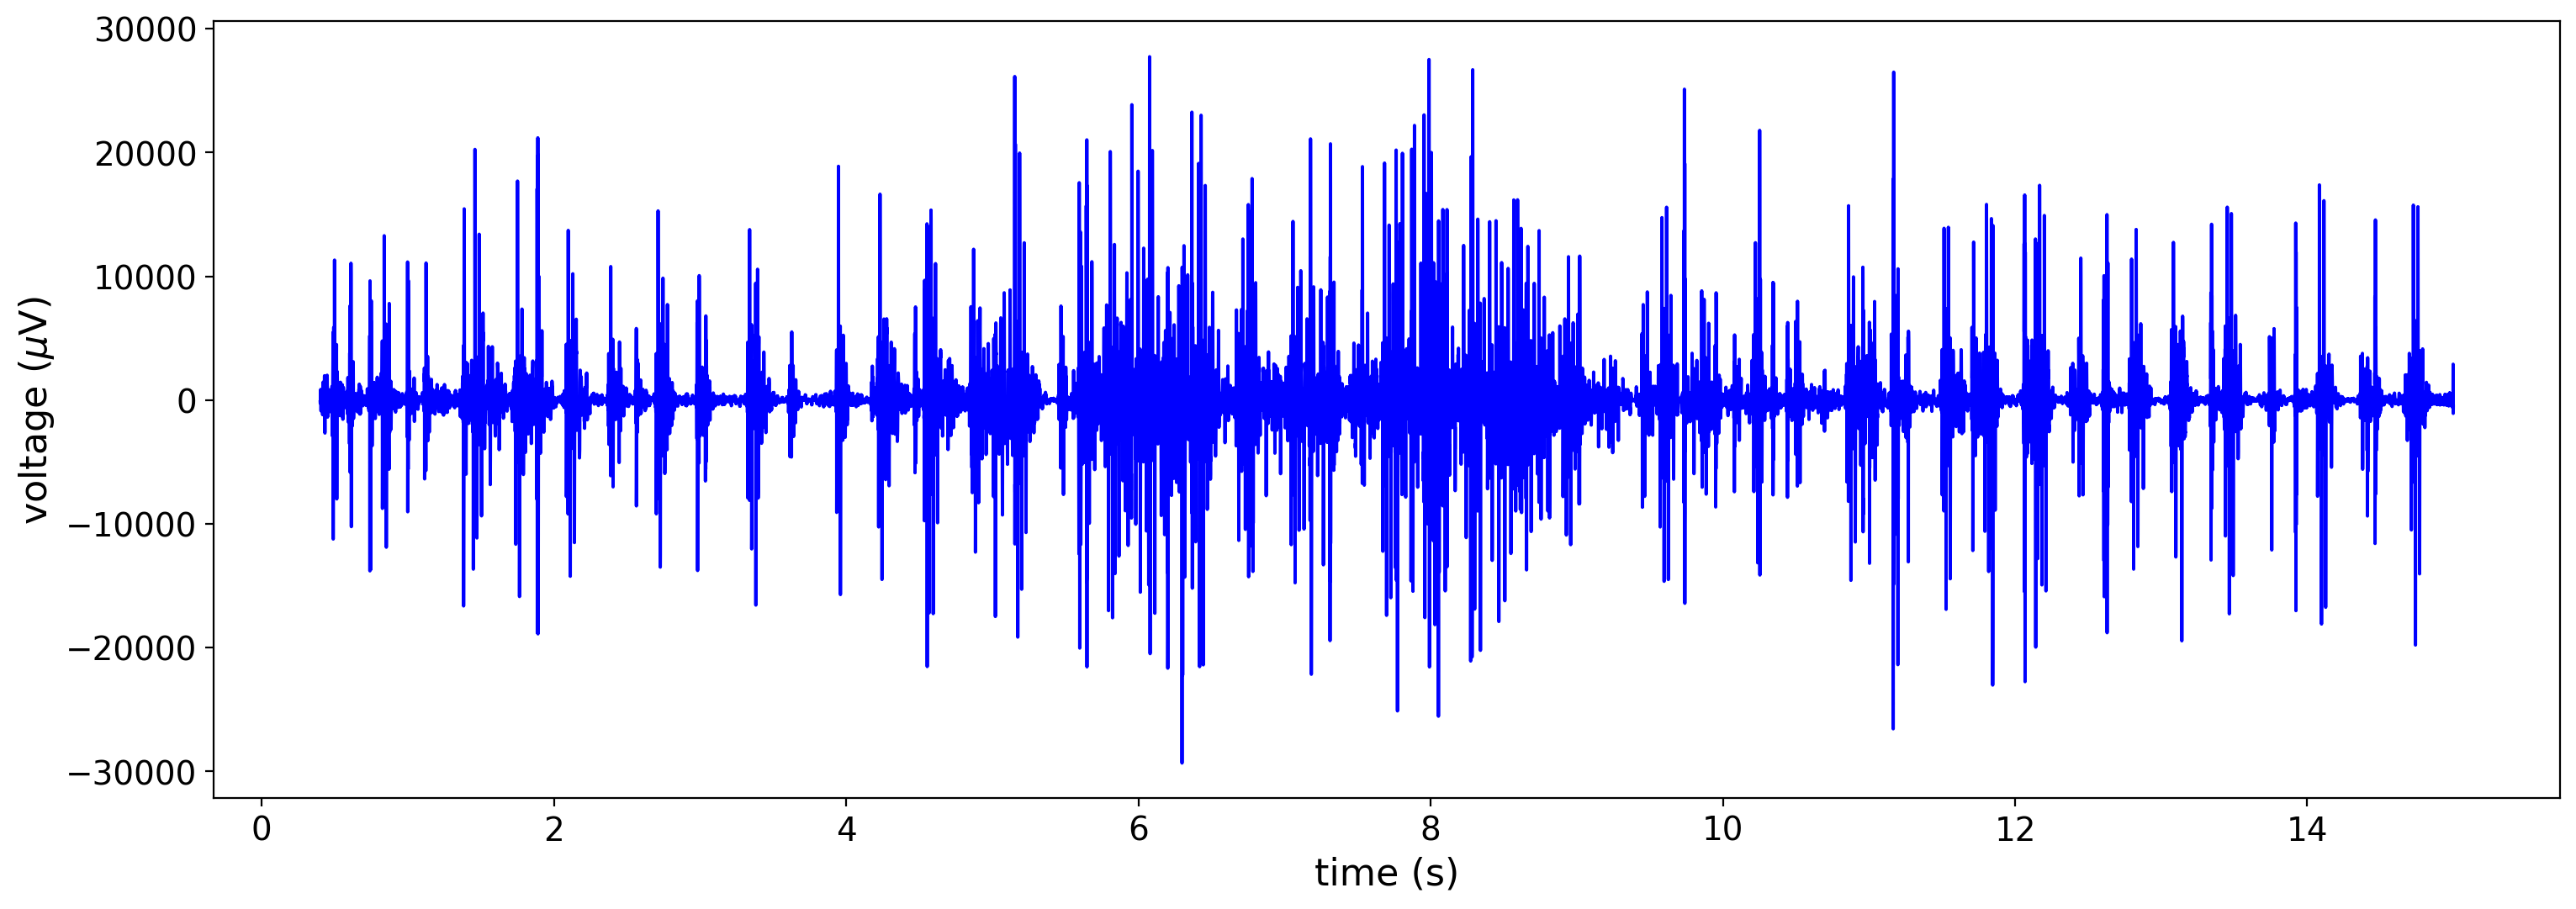

In [235]:
# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.show()

# Picos R

Al imicoio de esta segunda sección se indicó que se trabajaría con la fórmula F_cardiaca = NumerosPicos_R (durante 6s)* 10, esto es debido a  que las señales de audio tienen mucho ruido y que el ritmo cardíaco no es regular (sinusal).

Luego, en la siguiente función se calculará los máximos locales. Dado la naturaleza de la señal, se decide utilizar una técnica de suavizado. Esto con el fin de evitar que a la hora de calcular los máximos locales se incluyan valores del ruido de la señal. Véase en líneas anteriores que la gráfica de la señal tiene mucho ruido.

In [236]:
def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.80):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")
    
        #Se aplica un suavizado de a la senal con el metodo convolve
    window_size = 1 
    smoothed_waveData = np.convolve(waveData, np.ones(window_size)/window_size, mode='same')

    # Calcular el intervalo de la señal suavizada
    interval = max(smoothed_waveData)- min(smoothed_waveData)
    threshold = threshold_ratio * interval + min(smoothed_waveData)
    # Este suavizado evita que los valores de threshold se salgan de los límites establecidos
    
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False
    ultimo_maximo_local = 0
    tMin = 0.2
    
    for i in range(0, len(waveData)):
            
        if waveData[i] >= threshold  and (timeECG[i] - timeECG[ultimo_maximo_local]) >= tMin:
        
        #If a threshold value is surpassed,
            # the indices and values are saved 
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])
            
            ultimo_maximo_local = i
            
        elif banner == True and waveData[i] < threshold : #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False           
            
    return mxs_indices



In [173]:
mxs_indices = detecta_maximos_locales(timeECG, waveData) # Guarda en una lista los indices de los
                                                            #maximos locales 
print (mxs_indices)



[2118, 2701, 7094, 7663, 9507, 10390, 10815, 11353, 11932, 12756, 13556, 14267, 14728, 15146, 15755, 18674, 19704, 21534, 23332, 27366]


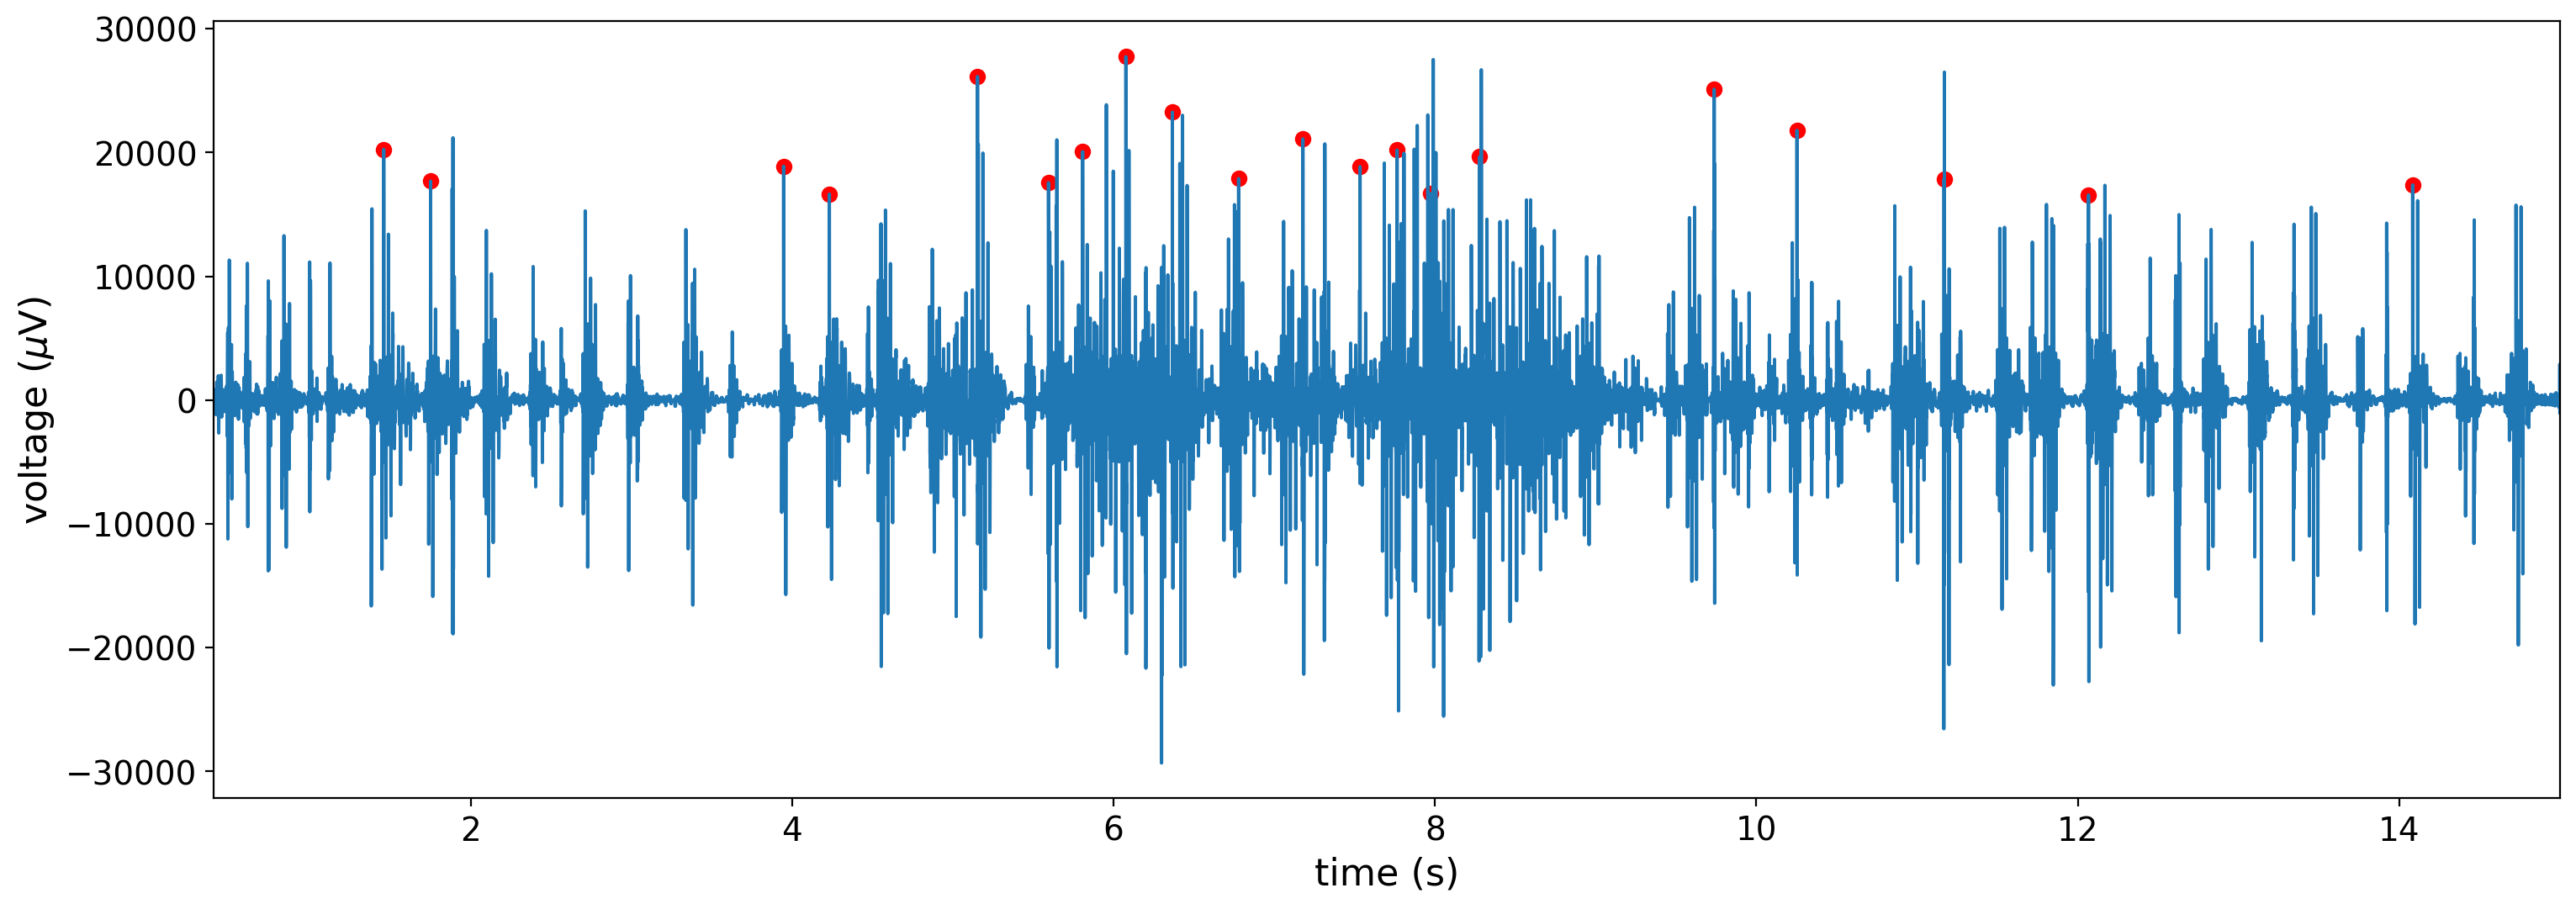

In [174]:
#Se grafican la senal con los maximos locales

plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()

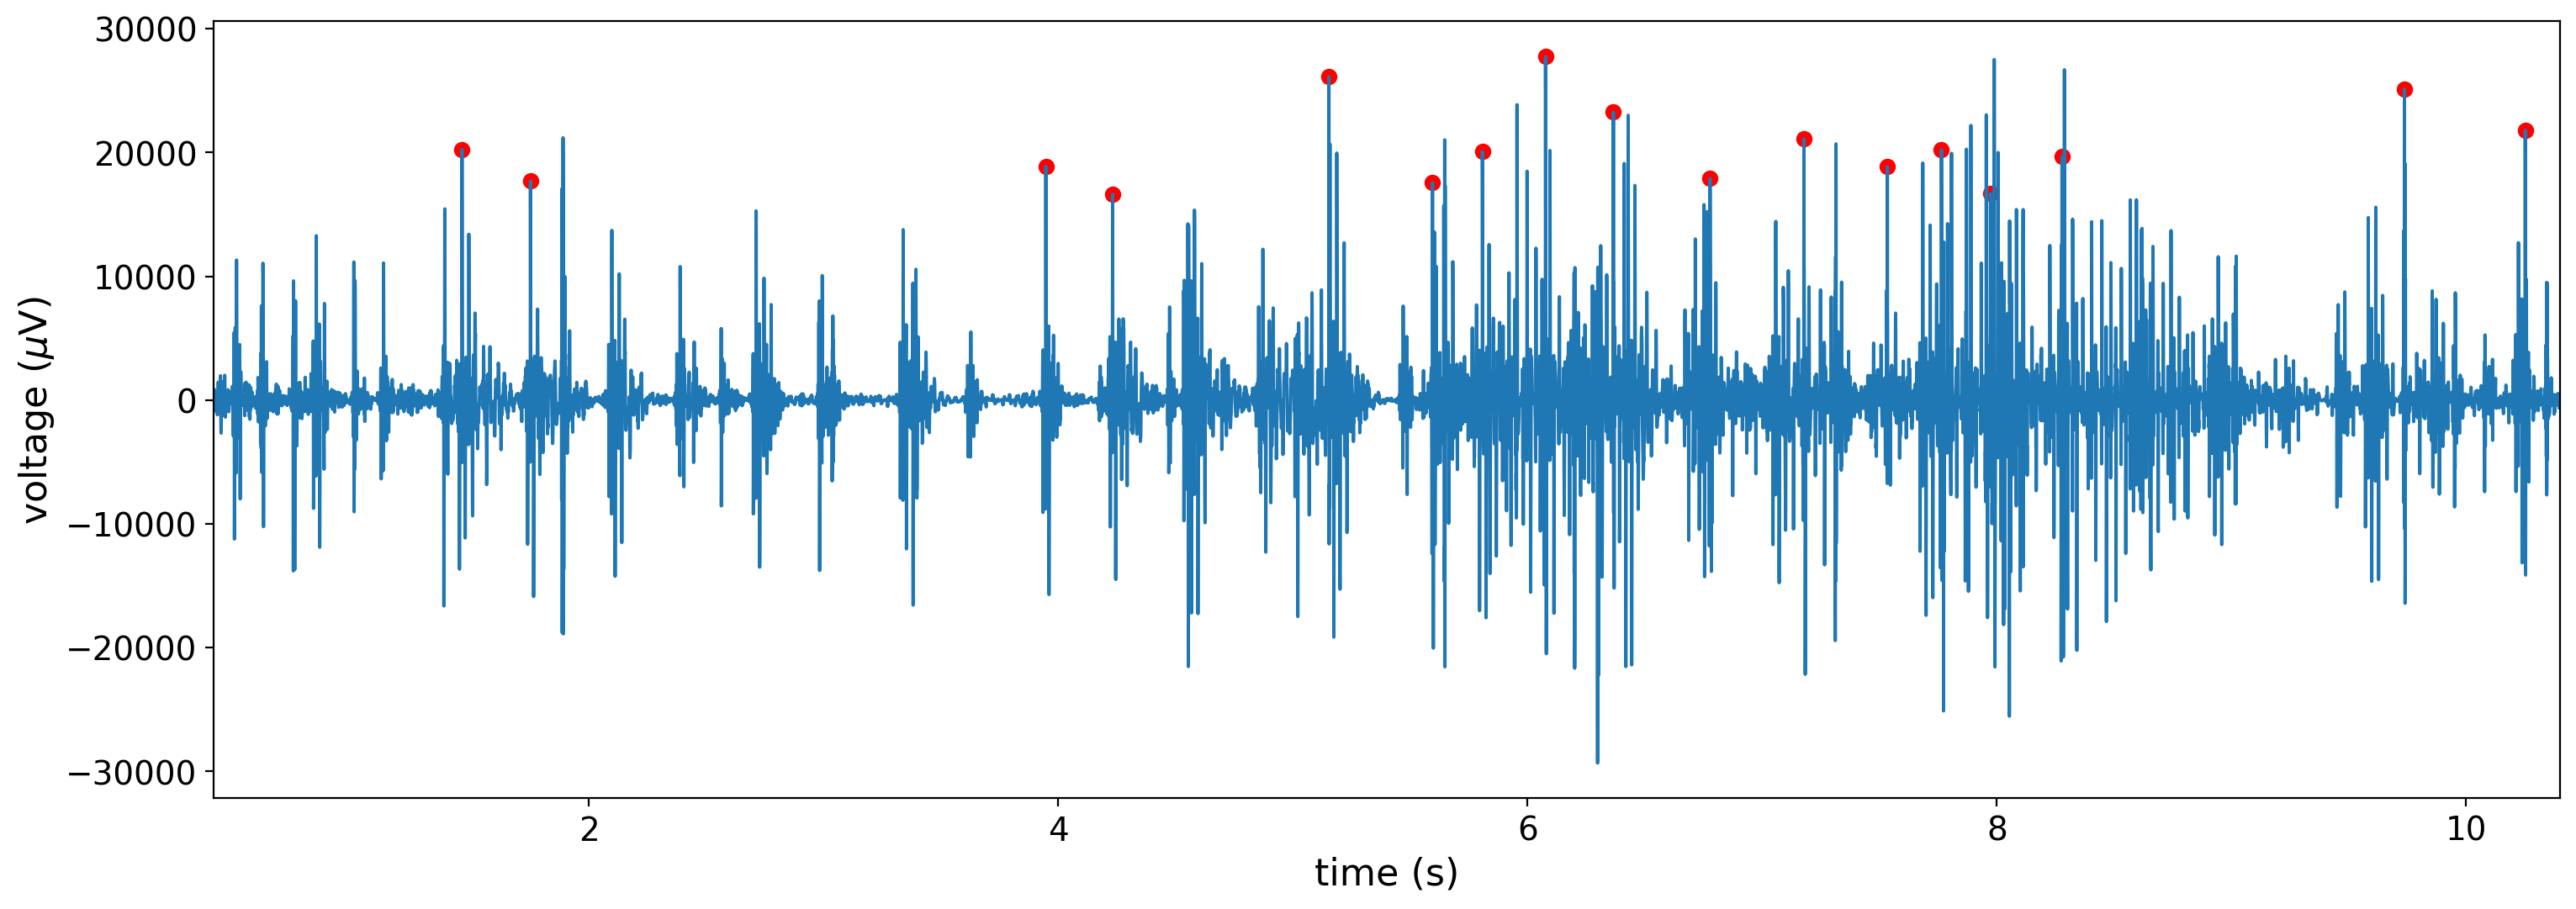

In [175]:
# Close up from an initial second to an end second
# Se vuelve a graficar la senal con los maximos locales pero esta vez se delimita aun mas 
#el valor del tiempo 
init_sec = 0
end_sec = 10
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(timeECG[init_sec*2000],timeECG[end_sec*2000])
plt.plot(timeECG[init_sec*2000:end_sec*2000], waveData[init_sec*2000:end_sec*2000])
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()

# Frecuencia Cardíaca

Para obtener la frecuencia ,se debe contar la cantidad de ondas R que hay en un periodo de 6 segundos para aplicar
la fórmula que se mencionó en líneas anteriores.

La siguiente función calcula el números de picos R o también llamados ondas R en un intervalo de tiempo.Considere que a nivel práctico se observo que para obtener resultados fiables se optó por obtener un promedio de las frecuencias. Es decir, se contó los picos R para 2, 4,6,10 segundos y luego se calculó su frecuencia asociada a cada tiempo respectivo. Por ejemplo, para un tiempo t=4 segundos, la frecuencia se obtiene Numero Ondas R (4s) * (60s/4). Es decir, se extrapola el resultado para obtener el ritmo cardíaco en latidos por minutos (lpm)

In [237]:
def NumPicosR(timeECG, waveData):
    rangoTiempo = [2,4,6,10]
    factor = [30,15,10,6]
    frecuencias= []
    mxs_periodo = [] #Obtiene los maximos locales en un periodo de time= 6 segundos
    for t in range (0, len(rangoTiempo)):
        for i in mxs_indices:
            if 0.4 <= timeECG[i] <= rangoTiempo[t]:
                mxs_periodo.append(i)

        # Calcular la cantidad de máximos locales dentro del período de 6 segundos
        cant_mxs_periodo = len(mxs_periodo)
        mxs_periodo = []
        frecuencias.append( cant_mxs_periodo * int (factor[t]))

    print ("La frecuencia cardíaca es de : ",int  (np.mean(np.abs(frecuencias))),"lpm" )
    
NumPicosR(timeECG,waveData)


La frecuencia cardíaca es de :  67 lpm


Nótese que las funciones anteriores solo calculan la frecuencia de un archivo de audio 
en particular por lo que se procede a definir una función que permita hacer ese mismo cálculo para
 n archivos de audios simultálneamente

In [227]:
#Primero se calcula la tasa de muestreo para uno de los archivos. Considere que
# si los archivos tienen la misma tasa de muestreo solo será necesario realizar 
# este cálculo una vez. De lo contrario deberá hacerlo para cada señal de audio.
# En el presente trabajo solo se hará una vez.

ruta_archivo = "f0010.wav"  # se cal

# Abre el archivo de audio en modo lectura
with wave.open(ruta_archivo, 'rb') as archivo_audio:
    # Obtiene la tasa de muestreo del archivo de audio
    tasa_de_muestreo = archivo_audio.getframerate()

print("Tasa de muestreo: {} Hz".format(tasa_de_muestreo))

print ()

print()


lista_frecuencias = ["Frecuencia Promedio"]
lista_nombres = ["ID"]



def principal():
    lista_mxs_indices = []
    print ("  ID archivo ","          ", "Frecuencia promedio (lpm)")
    print ()
    for i in range(0, len(audios)):
        timeECG, waveData = ecg(audios[i])


            #Seconds at which we are going to cut the recording
        n1 = .40
        n2 = 15

        m1 = int(n1*2000)
        m2 = int(n2*2000)

        #print(timeECG[m1])
        #print(timeECG[m2])

        timeECG, waveData = timeECG[m1:m2], waveData[m1:m2]
        mxs_indices = detecta_maximos_locales(timeECG, waveData) # Guarda en una lista temporal los indices de los
                                                            #maximos locales 
            
            
        rangoTiempo = [2,4,6,10]
        factor = [30,15,10,6]
        frecuencias= []
        mxs_periodo = [] #Obtiene los maximos locales en un periodo de time= 6 segundos
        for t in range (0, len(rangoTiempo)):
            for j in mxs_indices:
                if 0.4 <= timeECG[j] <= rangoTiempo[t]:
                    mxs_periodo.append(j)

            # Calcular la cantidad de máximos locales dentro del período de 6 segundos
            cant_mxs_periodo = len(mxs_periodo)
            mxs_periodo = []
            frecuencias.append( cant_mxs_periodo * int (factor[t]))

        frecuencia_cardiaca = (int  (np.mean(np.abs(frecuencias))) )
        

        print ("  ",audios [i],"                   ", frecuencia_cardiaca )
        print ()
        
        
        lista_frecuencias.append(frecuencia_cardiaca)
        lista_nombres.append (audios[i])

#Si se quiere ver las gráficas de los picos R se debe descomentar las siguiente líneas de código


        #init_sec = 0
        #end_sec = 10
        
        
        
        #plt.figure(figsize=(18,6))
        #plt.xlabel(r'time (s)')
        #plt.ylabel(r'voltage ($\mu$V)')
        #plt.xlim(timeECG[init_sec*2000],timeECG[end_sec*2000])
        #plt.plot(timeECG[init_sec*2000:end_sec*2000], waveData[init_sec*2000:end_sec*2000])
        #plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
        #plt.show()
principal()  




Tasa de muestreo: 2000 Hz


  ID archivo             Frecuencia promedio (lpm)

   f0010.wav                     41

   f0011.wav                     67

   f0012.wav                     125

   f0013.wav                     68

   f0014.wav                     21

   f0015.wav                     140

   f0016.wav                     74

   f0017.wav                     86

   f0018.wav                     111

   f0019.wav                     138

   f0020.wav                     91

   f0021.wav                     138

   f0022.wav                     60

   f0023.wav                     107

   f0024.wav                     104

   f0025.wav                     76



De los resultados anteriores,se puede concluir que el método utilizado responde a los requirimientos solicitados, sin embargo, es poco útil para señales que tiene mucho ruido. Por ejemplo, el valor del ritmo para f0014 dista del valor real, ya que si el lector calcula de forma manual dicha frecuencia al escuchar el audio, notará que la frecuencia real es mayor. Por lo que, aunque la solución del proyecta esta orientada a señales de audio con poco ruido.